<a href="https://colab.research.google.com/github/zainabintech/DDoS-Detection-System-/blob/main/Another_copy_of_FFfinal_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive
drive.mount('/content/drive')

# List of CSV files to read (update the paths to match your Google Drive structure)
csv_files = [
    '/content/drive/MyDrive/data/LDAP.csv',
    '/content/drive/MyDrive/data/MSSQL.csv',
    '/content/drive/MyDrive/data/NetBIOS.csv',
    '/content/drive/MyDrive/data/Portmap.csv',
    '/content/drive/MyDrive/data/Syn.csv',
    '/content/drive/MyDrive/data/UDP.csv',
    '/content/drive/MyDrive/data/UDPLag.csv',
]

# Read and sample from each CSV using chunks
dfs = []
chunk_size = 100000  # Rows per chunk

for file in csv_files:
    try:
        print(f"Reading from {file} ...")
        if not os.path.exists(file):
            print(f"File not found: {file}")
            continue

        chunk_reader = pd.read_csv(file, chunksize=chunk_size, low_memory=False)
        for chunk in chunk_reader:
            sampled_chunk = chunk.sample(min(5000, len(chunk)), random_state=42)
            dfs.append(sampled_chunk)
        print(f"Finished processing: {file}")
    except Exception as e:
        print(f"Error in {file}: {e}")

# Combine and save
if dfs:
    df = pd.concat(dfs, ignore_index=True)
    print(f"Combined dataset shape: {df.shape}")

    print("\nFeature (column) names and data types:")
    for col in df.columns:
        print(f"- {col}: {df[col].dtype}")

    print(f"\nTotal number of features: {len(df.columns)}")

    #  Save the DataFrame to CSV
    output_path = '/content/drive/MyDrive/data/combined_sampled_ddos.csv'
    df.to_csv(output_path, index=False)
    print(f"\nSampled dataset saved to: {output_path}")

else:
    print("No data was loaded. Please check your file paths.")


Mounted at /content/drive
Reading from /content/drive/MyDrive/data/LDAP.csv ...
Error in /content/drive/MyDrive/data/LDAP.csv: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.
Reading from /content/drive/MyDrive/data/MSSQL.csv ...
Finished processing: /content/drive/MyDrive/data/MSSQL.csv
Reading from /content/drive/MyDrive/data/NetBIOS.csv ...
Finished processing: /content/drive/MyDrive/data/NetBIOS.csv
Reading from /content/drive/MyDrive/data/Portmap.csv ...
Finished processing: /content/drive/MyDrive/data/Portmap.csv
Reading from /content/drive/MyDrive/data/Syn.csv ...
Finished processing: /content/drive/MyDrive/data/Syn.csv
Reading from /content/drive/MyDrive/data/UDP.csv ...
Finished processing: /content/drive/MyDrive/data/UDP.csv
Reading from /content/drive/MyDrive/data/UDPLag.csv ...


KeyboardInterrupt: 

In [ ]:
# ==============================
# Check Class Names for DDoS Attack Dataset
# ==============================
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Current user information and timestamp
current_user = "zainabintechdataset"
current_time = "2025-05-15 13:39:26"
timestamp = "20250515_124845"

# Data path
data_path = "/content/drive/MyDrive/data/"

# Load the preprocessed dataset
train_df = pd.read_csv(f"{data_path}train_dataset_{timestamp}.csv")

# List original data files
ddos_files = [
    'LDAP.csv',
    'MSSQL.csv',
    'NetBIOS.csv',
    'Portmap.csv',
    'Syn.csv',
    'UDP.csv',
    'UDPLag.csv'
]

print("Original dataset files:")
for file in ddos_files:
    print(f"- {file}")

# Check label distribution in the preprocessed dataset
label_counts = dict(Counter(train_df['Label']))
print("\nLabel distribution in preprocessed dataset:")
print(label_counts)

# Since you have 7 attack types and potentially a benign/normal class (total of 8 classes),
# here's a likely mapping based on common DDoS dataset conventions:
class_mapping = {
    0: 'Benign/Normal Traffic',
    1: 'LDAP DDoS',
    2: 'MSSQL DDoS',
    3: 'NetBIOS DDoS',
    4: 'Portmap DDoS',
    5: 'Syn DDoS',
    6: 'UDP DDoS',
    7: 'UDPLag DDoS'
}

# Print the mapping with sample counts
print("\nProposed class labels and their meanings:")
for label, name in class_mapping.items():
    count = label_counts.get(label, 0)
    print(f"Label {label}: {name} - {count} samples")

# Visualize the distribution with class names
plt.figure(figsize=(14, 6))
counts = [label_counts.get(i, 0) for i in range(8)]
class_names = [class_mapping.get(i, f"Class {i}") for i in range(8)]

# Create bar chart
bars = plt.bar(range(len(counts)), counts, color='steelblue')
plt.xticks(range(len(counts)), class_names, rotation=45, ha='right')
plt.xlabel('Traffic Type')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')

# Add counts on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
             str(counts[i]), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(f"{data_path}ddos_class_distribution_{timestamp}.png", dpi=300)
plt.show()

# Check a few rows of each class to confirm the mapping
print("\nChecking a few samples from each class to verify:")
for label in range(8):
    class_samples = train_df[train_df['Label'] == label].head(2)
    if not class_samples.empty:
        print(f"\nClass {label} ({class_mapping[label]}) samples:")
        print(class_samples)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/combined_sampled_ddos.csv')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Strip leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

# Convert 'SimillarHTTP' to string (if it exists) for encoding
if 'SimillarHTTP' in df.columns:
    df['SimillarHTTP'] = df['SimillarHTTP'].astype(str)

# Initialize label encoder
le = LabelEncoder()

# Encode 'SimillarHTTP' and 'Label' if present
if 'SimillarHTTP' in df.columns:
    df['SimillarHTTP'] = le.fit_transform(df['SimillarHTTP'])

if 'Label' in df.columns:
    df['Label'] = le.fit_transform(df['Label'])
else:
    print(" 'Label' column not found in dataset!")


    # Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract useful features
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.weekday  # 0 = Monday, 6 = Sunday

# Drop original Timestamp column
df.drop(columns='Timestamp', inplace=True)


# Drop unnecessary identifier columns
columns_to_drop = ['Source IP', 'Destination IP', 'Flow ID', 'Unnamed: 0']
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Preview the processed DataFrame
print(df.head())

# Save cleaned data to Google Drive (use the same directory as your input files)
output_path = '/content/drive/MyDrive/data/cleaned_dataset.csv'
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")


   Source Port  Destination Port  Protocol  Flow Duration  Total Fwd Packets  \
0          648             33678        17              1                  2   
1          859             29834        17              1                  2   
2          858             29229        17             49                  2   
3          648             17450        17              1                  2   
4          887             29513        17             48                  2   

   Total Backward Packets  Total Length of Fwd Packets  \
0                       0                        458.0   
1                       0                        458.0   
2                       0                        458.0   
3                       0                        458.0   
4                       0                        458.0   

   Total Length of Bwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  \
0                          0.0                  229.0                  229.0   
1         

In [ ]:
# Check total number of NaN values
total_nans = df.isna().sum().sum()
print("\n Missing Value Report ")
print(f"Total missing (NaN) values in the dataset: {total_nans}")

# Show missing values per column (if any)
missing_per_column = df.isna().sum()
missing_columns = missing_per_column[missing_per_column > 0]
if not missing_columns.empty:
    print("\nColumns with missing values:")
    print(missing_columns)
else:
    print("No missing values in any column.")

# Mean imputation for numeric columns with missing values
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
        print(f"Filled missing values in column '{col}' with mean: {mean_value}")

# Print summary of the DataFrame
print("\n DataFrame Preview ")
print(df.head())

print("\n Feature Summary ")
print(f"Total number of features (columns): {len(df.columns)}")

print("\nFeature names and data types:")
print(df.dtypes)



 Missing Value Report 
Total missing (NaN) values in the dataset: 5

Columns with missing values:
Flow Bytes/s    5
dtype: int64
Filled missing values in column 'Flow Bytes/s' with mean: inf

 DataFrame Preview 
   Source Port  Destination Port  Protocol  Flow Duration  Total Fwd Packets  \
0          648             33678        17              1                  2   
1          859             29834        17              1                  2   
2          858             29229        17             49                  2   
3          648             17450        17              1                  2   
4          887             29513        17             48                  2   

   Total Backward Packets  Total Length of Fwd Packets  \
0                       0                        458.0   
1                       0                        458.0   
2                       0                        458.0   
3                       0                        458.0   
4               

In [ ]:
# Initial row count
initial_rows = df.shape[0]

# Replace inf/-inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop all rows with missing values
df.dropna(inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Summary
final_rows = df.shape[0]
print(f"Removed {initial_rows - final_rows} rows containing NaN, inf, or duplicates.")




Removed 42381 rows containing NaN, inf, or duplicates.


In [ ]:
# Ensure 'Label' is numeric
df['Label'] = pd.to_numeric(df['Label'], errors='coerce')

# Drop non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation with the label directly
correlation_with_label = numeric_df.corr()['Label'].sort_values(ascending=False)

# Set a correlation threshold
threshold = 0.6
relevant_features = correlation_with_label[abs(correlation_with_label) > threshold].index.tolist()

# Remove the target label from the list of features
if 'Label' in relevant_features:
    relevant_features.remove('Label')

# Create the filtered DataFrame
df_filtered = df[relevant_features + ['Label']]

print("Filtered DataFrame created with features:", relevant_features)
print(f"Number of selected features (excluding 'Label'): {len(relevant_features)}")


Filtered DataFrame created with features: ['Fwd Packet Length Max', 'Max Packet Length', 'Avg Fwd Segment Size', 'Fwd Packet Length Mean', 'Packet Length Mean', 'Min Packet Length', 'Fwd Packet Length Min', 'Average Packet Size', 'Flow Bytes/s']
Number of selected features (excluding 'Label'): 9


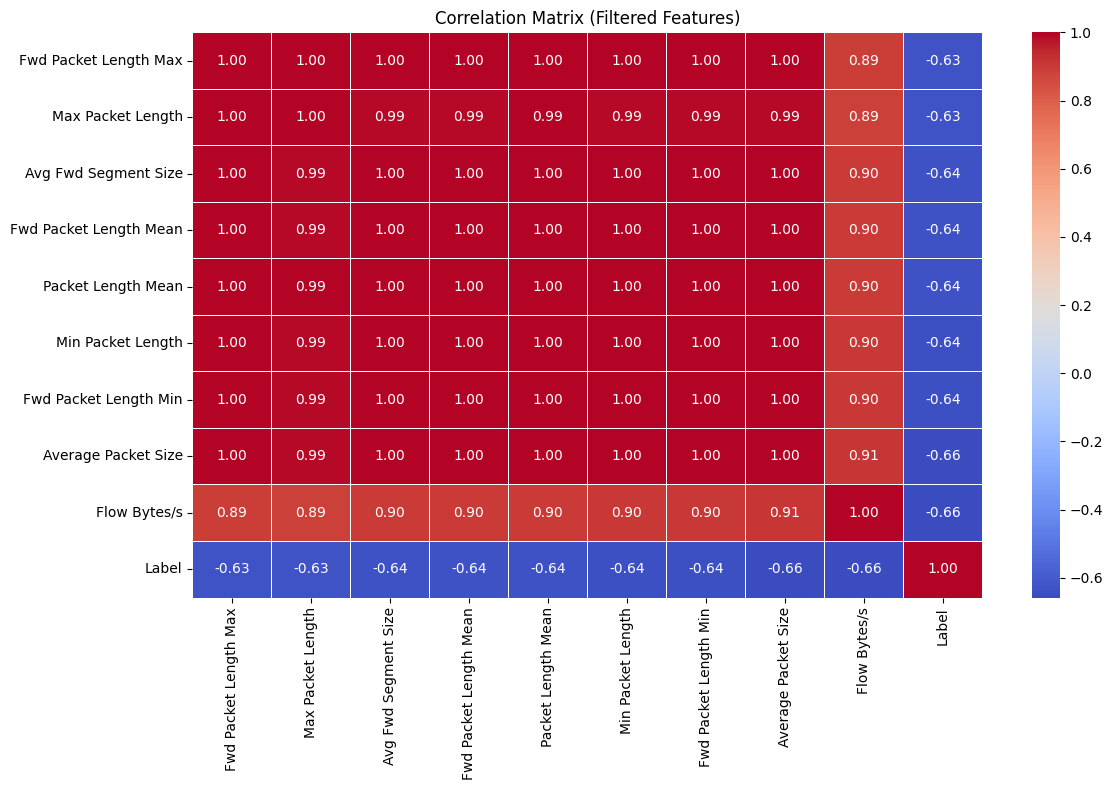

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Filtered Features)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# First, let's do a complete NaN analysis
def analyze_nan(df):
    print("\n=== Detailed NaN Analysis ===")

    # 1. Total NaN count
    total_nan = df.isna().sum().sum()
    print(f"\nTotal NaN values in dataset: {total_nan}")

    # 2. NaN count per column (only showing columns with NaN)
    nan_columns = df.columns[df.isna().any()].tolist()
    if nan_columns:
        print("\nColumns containing NaN values:")
        for col in nan_columns:
            nan_count = df[col].isna().sum()
            nan_percentage = (nan_count / len(df)) * 100
            print(f"• {col}: {nan_count} NaN values ({nan_percentage:.2f}%)")
    else:
        print("\nNo columns contain NaN values")

    # 3. Check for infinite values
    inf_columns = df.columns[np.isinf(df.select_dtypes(include=np.number)).any()].tolist()
    if inf_columns:
        print("\nColumns containing infinite values:")
        for col in inf_columns:
            inf_count = np.isinf(df[col]).sum()
            inf_percentage = (inf_count / len(df)) * 100
            print(f"• {col}: {inf_count} infinite values ({inf_percentage:.2f}%)")
    else:
        print("\nNo columns contain infinite values")

    # 4. Check for 'null' string values
    null_str_count = (df == 'null').sum().sum()
    if null_str_count > 0:
        print(f"\nFound {null_str_count} 'null' string values in the dataset")

    # 5. Check for empty strings
    empty_str_count = (df == '').sum().sum()
    if empty_str_count > 0:
        print(f"\nFound {empty_str_count} empty string values in the dataset")

# Run the analysis
analyze_nan(df)

# Let's also check specific problematic columns we found earlier
problematic_columns = ['Flow Bytes/s']  # Add any other columns you want to check
print("\n=== Detailed Check of Specific Columns ===")
for col in problematic_columns:
    if col in df.columns:
        print(f"\nAnalyzing column: {col}")
        print(f"Data type: {df[col].dtype}")
        print(f"Number of NaN: {df[col].isna().sum()}")
        print(f"Number of infinite values: {np.isinf(df[col]).sum()}")
        print("\nValue distribution:")
        print(df[col].describe())


=== Detailed NaN Analysis ===

Total NaN values in dataset: 0

No columns contain NaN values

No columns contain infinite values

=== Detailed Check of Specific Columns ===

Analyzing column: Flow Bytes/s
Data type: float64
Number of NaN: 0
Number of infinite values: 0

Value distribution:
count    9.926190e+05
mean     6.454291e+08
std      8.405655e+08
min      0.000000e+00
25%      9.346939e+06
50%      4.580000e+08
75%      8.920000e+08
max      2.944000e+09
Name: Flow Bytes/s, dtype: float64


In [ ]:
# Loop over numeric features to detect outliers
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns

print("\nPotential outliers per feature (using IQR method):")
for col in numeric_columns:
    if col == 'Label':
        continue  # skip target
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((df_filtered[col] < lower_bound) | (df_filtered[col] > upper_bound)).sum()

    if outlier_count > 0:
        print(f"• {col}: {outlier_count} potential outliers")



Potential outliers per feature (using IQR method):
• Fwd Packet Length Max: 121482 potential outliers
• Max Packet Length: 121869 potential outliers
• Avg Fwd Segment Size: 121584 potential outliers
• Fwd Packet Length Mean: 121584 potential outliers
• Packet Length Mean: 121607 potential outliers
• Min Packet Length: 121576 potential outliers
• Fwd Packet Length Min: 121578 potential outliers
• Average Packet Size: 121569 potential outliers
• Flow Bytes/s: 89324 potential outliers


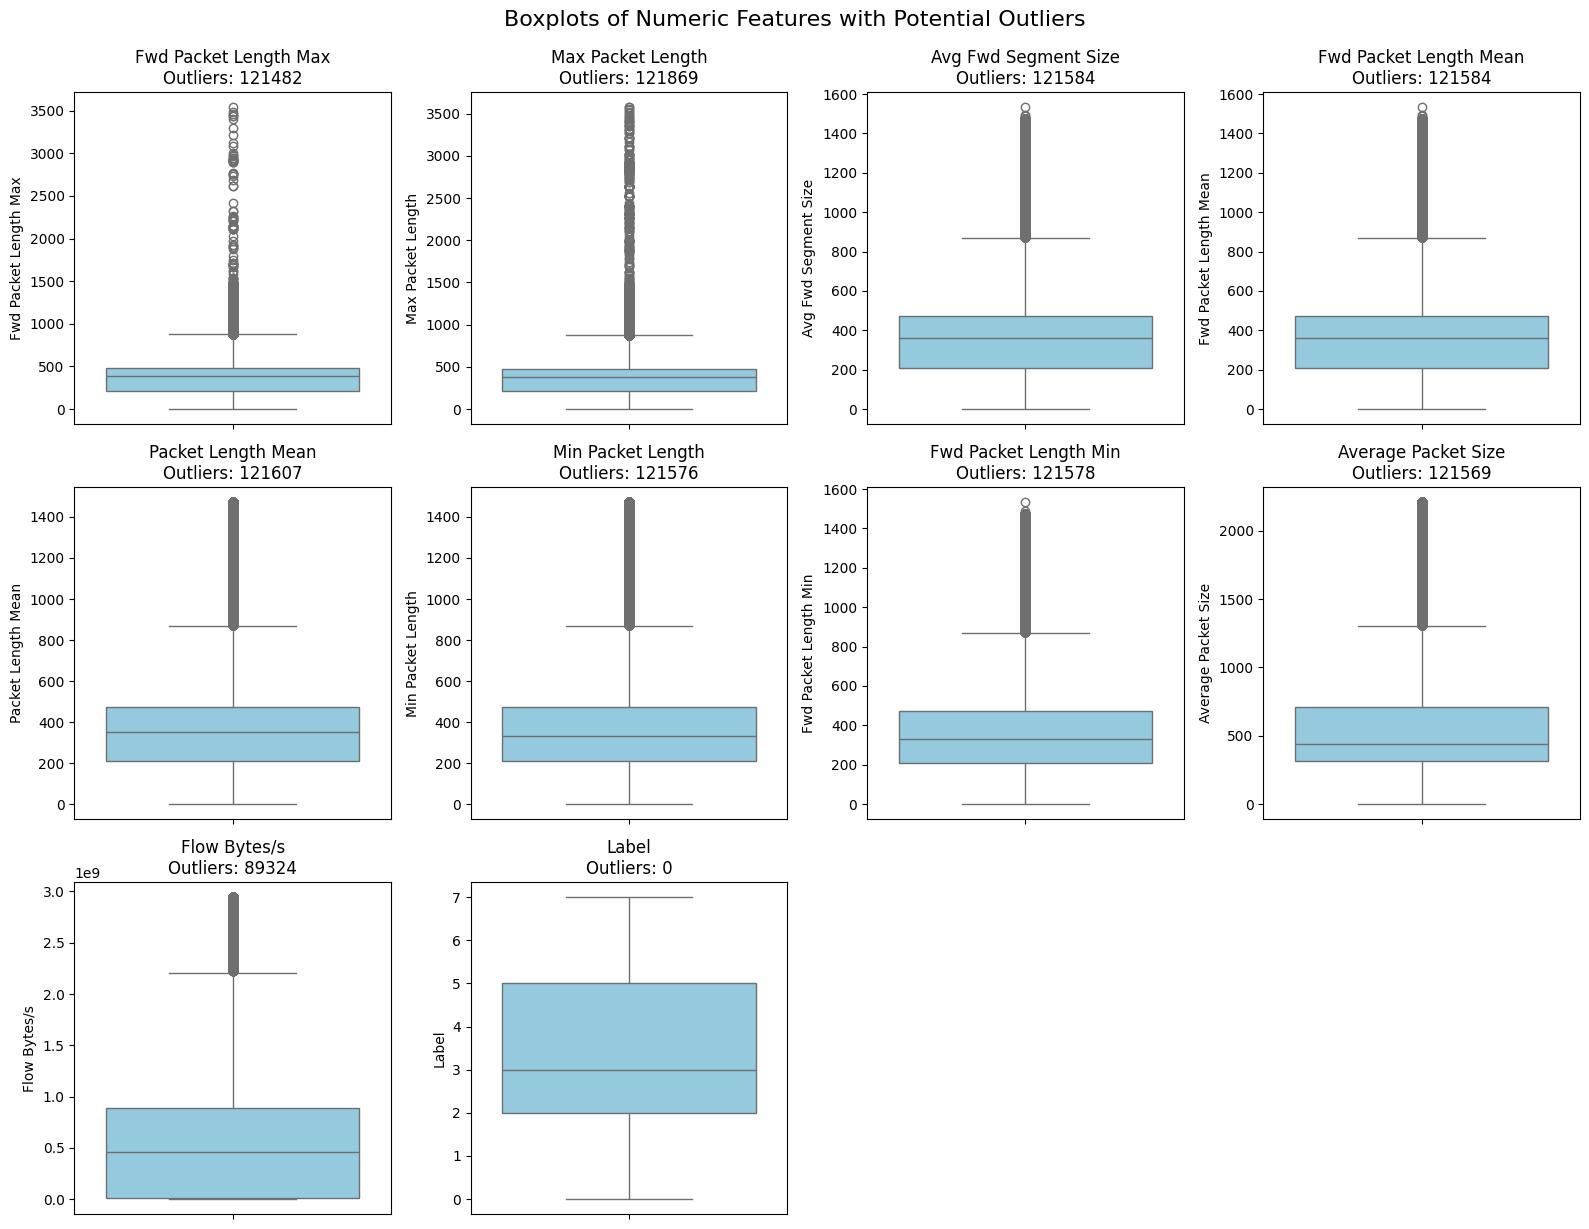

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filtered is already defined and contains numeric columns
numeric_cols = df_filtered.select_dtypes(include='number').columns

num_cols = len(numeric_cols)
plots_per_row = 4
num_rows = (num_cols + plots_per_row - 1) // plots_per_row

plt.figure(figsize=(plots_per_row * 4, num_rows * 4))

for idx, col in enumerate(numeric_cols, start=1):
    outlier_count = ((df_filtered[col] < df_filtered[col].quantile(0.25) - 1.5 * (df_filtered[col].quantile(0.75) - df_filtered[col].quantile(0.25))) |
                     (df_filtered[col] > df_filtered[col].quantile(0.75) + 1.5 * (df_filtered[col].quantile(0.75) - df_filtered[col].quantile(0.25)))).sum()

    plt.subplot(num_rows, plots_per_row, idx)
    sns.boxplot(y=df_filtered[col], color='skyblue')
    plt.title(f'{col}\nOutliers: {outlier_count}')
    plt.tight_layout()

plt.suptitle('Boxplots of Numeric Features with Potential Outliers', fontsize=16, y=1.02)
plt.show()


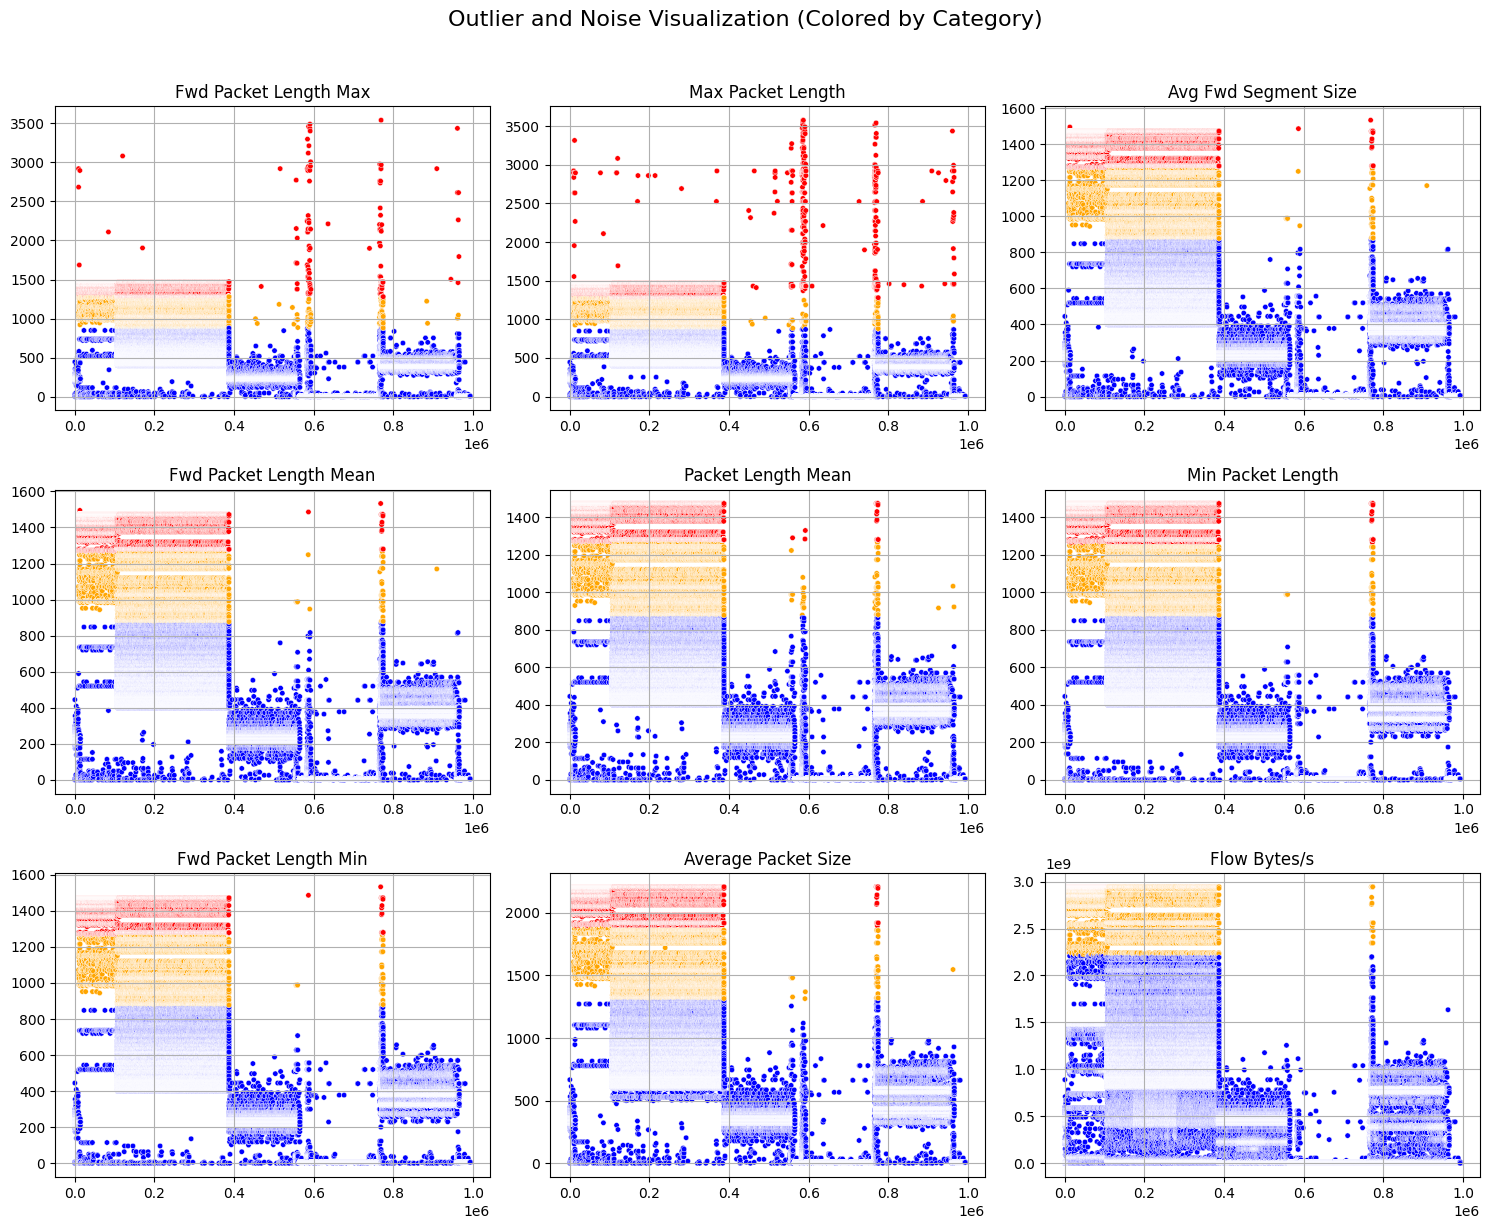

In [ ]:
# Define numeric features, excluding the target label
numeric_cols = [col for col in df_filtered.select_dtypes(include='number').columns if col != 'Label']

plots_per_row = 3
num_cols = len(numeric_cols)
num_rows = (num_cols + plots_per_row - 1) // plots_per_row

plt.figure(figsize=(plots_per_row * 5, num_rows * 4))

for idx, col in enumerate(numeric_cols, start=1):
    data = df_filtered[col]

    # Calculate IQR thresholds
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    mild_lower = Q1 - 1.5 * IQR
    mild_upper = Q3 + 1.5 * IQR
    extreme_lower = Q1 - 3 * IQR
    extreme_upper = Q3 + 3 * IQR

    # Classify values: Normal, Outlier, or Noise
    def classify(val):
        if val < extreme_lower or val > extreme_upper:
            return 'Noise'
        elif val < mild_lower or val > mild_upper:
            return 'Outlier'
        else:
            return 'Normal'

    categories = data.apply(classify)

    # Plotting
    plt.subplot(num_rows, plots_per_row, idx)
    sns.scatterplot(x=range(len(data)), y=data, hue=categories,
                    palette={'Normal': 'blue', 'Outlier': 'orange', 'Noise': 'red'},
                    legend=False, s=15)
    plt.title(f"{col}")
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)

plt.suptitle('Outlier and Noise Visualization (Colored by Category)', fontsize=16, y=1.02)
plt.tight_layout()

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import warnings

# Suppress future warnings from sklearn
warnings.filterwarnings("ignore", category=FutureWarning)

# Separate features and target
X = df_filtered.drop(columns=['Label'])
y = df_filtered['Label']

# Display original class distribution
class_counts = Counter(y)
print("Class distribution before SMOTE:", class_counts)

# Find the maximum class size
max_class_size = max(class_counts.values())

# Define sampling strategy to oversample all classes to the maximum size
sampling_strategy = {cls: max_class_size for cls in class_counts}

# Apply SMOTE
smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({2: 280364, 5: 233134, 6: 190373, 3: 177912, 1: 97922, 4: 9255, 0: 3556, 7: 103})
Class distribution after SMOTE: Counter({3: 280364, 0: 280364, 1: 280364, 2: 280364, 4: 280364, 5: 280364, 6: 280364, 7: 280364})


Visualize Class Distributions (Before vs. After SMOTE)


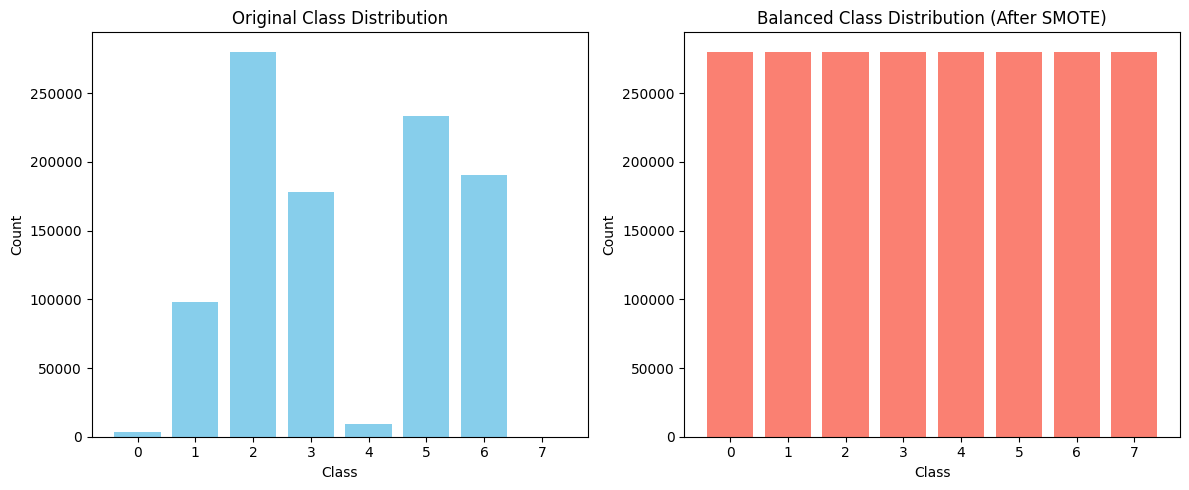

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
ax[0].bar(Counter(y).keys(), Counter(y).values(), color='skyblue')
ax[0].set_title("Original Class Distribution")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

# After SMOTE
ax[1].bar(Counter(y_resampled).keys(), Counter(y_resampled).values(), color='salmon')
ax[1].set_title("Balanced Class Distribution (After SMOTE)")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


## 1.8 Feature Scaling (Standardization)

**Purpose**:  
Standardize numeric features to have zero mean and unit variance, ensuring compatibility with machine learning algorithms sensitive to feature scales in the CICIDS2019 dataset.

---

### Steps

1. Select numeric features (excluding the `Label`) from the outlier-cleaned DataFrame.
2. Apply `StandardScaler` to transform features to a standard normal distribution.
3. Create a new DataFrame containing the scaled features and the original `Label` column.
4. Save the scaled dataset to Google Drive.
5. Display the first five rows of the scaled DataFrame.

---

### Technical Justification

- **Need for Scaling**:  
  The CICIDS2019 dataset contains features with vastly different scales (e.g., `Flow Duration` in milliseconds vs. `Packet Length` in bytes). Many machine learning algorithms (such as SVM, KNN, and Logistic Regression) are sensitive to these disparities. Standardization ensures all features contribute equally to the model.

- **StandardScaler**:  
  This technique transforms each feature to have a mean of 0 and a standard deviation of 1. It assumes data is normally distributed around the mean and works effectively after outlier treatment, as done in the previous step.

- **Preserving Label**:  
  The `Label` column represents the target classes and should not be scaled. It is already encoded and should remain unchanged for proper model training and evaluation.

- **Data Persistence**:  
  Saving the scaled dataset ensures the transformation is not repeated in subsequent stages, improving workflow efficiency and maintaining consistency in model development.

- **Preview**:  
  Displaying the scaled data helps confirm successful transformation—values should now be centered around zero with unit variance.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns only
columns_to_scale = X_resampled.select_dtypes(include=['float64', 'int64']).columns

# Handle missing values
X_resampled[columns_to_scale] = X_resampled[columns_to_scale].fillna(X_resampled[columns_to_scale].mean())

# Scale features
scaler = StandardScaler()
X_scaled = X_resampled.copy()
X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale])

# Combine with target
df_scaled = X_scaled.copy()
df_scaled['Label'] = y_resampled.reset_index(drop=True)

# Output status and preview
print("Feature scaling completed.")
print(" Preview of scaled data:")
print(df_scaled.head())



Feature scaling completed.
 Preview of scaled data:
   Fwd Packet Length Max  Max Packet Length  Avg Fwd Segment Size  \
0              -0.437711          -0.447279             -0.403128   
1              -0.437711          -0.447279             -0.403128   
2              -0.437711          -0.447279             -0.403128   
3              -0.437711          -0.447279             -0.403128   
4              -0.437711          -0.447279             -0.403128   

   Fwd Packet Length Mean  Packet Length Mean  Min Packet Length  \
0               -0.403128           -0.413674          -0.388088   
1               -0.403128           -0.413674          -0.388088   
2               -0.403128           -0.413674          -0.388088   
3               -0.403128           -0.413674          -0.388088   
4               -0.403128           -0.413674          -0.388088   

   Fwd Packet Length Min  Average Packet Size  Flow Bytes/s  Label  
0              -0.388289            -0.395684     -0.16

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Add timestamp to filenames
timestamp = datetime.utcnow().strftime('%Y%m%d_%H%M%S')

# Suppress future warnings from sklearn
warnings.filterwarnings("ignore", category=FutureWarning)

# Class names (not used directly, but kept for reference)
class_names = [
    'Benign/Normal Traffic',
    'LDAP DDoS',
    'MSSQL DDoS',
    'NetBIOS DDoS',
    'Portmap DDoS',
    'Syn DDoS',
    'UDP DDoS',
    'UDPLag DDoS'
]

# === 1. Separate features & target ===
X = df_filtered.drop(columns=['Label'])
y = df_filtered['Label']

print("Original class distribution:", Counter(y))

# === 2. Train/test split (80/20) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("\nPost-split distributions:")
print(" • Train:", Counter(y_train))
print(" • Test:", Counter(y_test))

# === 3. Apply SMOTE only ===
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nBalanced training distribution:", Counter(y_train_res))

# === 4. Standardize features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Back to DataFrame for convenience/saving
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# === 5. Save to CSV with timestamp ===
train_df = pd.concat([X_train_scaled, pd.Series(y_train_res, name='Label')], axis=1)
test_df = pd.concat([X_test_scaled, y_test.reset_index(drop=True)], axis=1)

# Check for NaN values before saving
print("\nChecking for NaN values:")
print("Training set NaN count:", train_df.isna().sum().sum())
print("Test set NaN count:", test_df.isna().sum().sum())

# Save datasets with timestamp
save_path = "/content/drive/MyDrive/data/"
train_df.to_csv(f"{save_path}train_dataset_{timestamp}.csv", index=False)
test_df.to_csv(f"{save_path}test_dataset_{timestamp}.csv", index=False)

print(f"\nDatasets saved in {save_path} with timestamp {timestamp}")
print("Final dataset shapes:")
print("Training set:", train_df.shape)
print("Test set:", test_df.shape)

# Verify saved files
train_verify = pd.read_csv(f"{save_path}train_dataset_{timestamp}.csv")
test_verify = pd.read_csv(f"{save_path}test_dataset_{timestamp}.csv")

print("\nVerifying saved datasets:")
print("Training set class distribution:", Counter(train_verify['Label']))
print("Test set class distribution:", Counter(test_verify['Label']))

# Save metadata
metadata = {
    'timestamp': timestamp,
    'user': 'zainabintech',
    'train_shape': train_df.shape,
    'test_shape': test_df.shape,
    'train_distribution': Counter(train_verify['Label']),
    'test_distribution': Counter(test_verify['Label'])
}

with open(f"{save_path}preprocessing_metadata_{timestamp}.txt", 'w') as f:
    f.write("DDoS Detection System - Preprocessing Metadata\n")
    f.write(f"Processed on: {timestamp}\n")
    f.write(f"User: {metadata['user']}\n")
    f.write(f"\nTraining set shape: {metadata['train_shape']}\n")
    f.write(f"Test set shape: {metadata['test_shape']}\n")
    f.write("\nClass distribution:\n")
    f.write(f"Training: {dict(metadata['train_distribution'])}\n")
    f.write(f"Test: {dict(metadata['test_distribution'])}\n")

print("\nData preprocessing complete!")


Original class distribution: Counter({2: 280364, 5: 233134, 6: 190373, 3: 177912, 1: 97922, 4: 9255, 0: 3556, 7: 103})

Post-split distributions:
 • Train: Counter({2: 224291, 5: 186507, 6: 152298, 3: 142330, 1: 78338, 4: 7404, 0: 2845, 7: 82})
 • Test: Counter({2: 56073, 5: 46627, 6: 38075, 3: 35582, 1: 19584, 4: 1851, 0: 711, 7: 21})

Balanced training distribution: Counter({5: 224291, 1: 224291, 6: 224291, 0: 224291, 2: 224291, 3: 224291, 4: 224291, 7: 224291})

Checking for NaN values:
Training set NaN count: 0
Test set NaN count: 0

Datasets saved in /content/drive/MyDrive/data/ with timestamp 20250515_151736
Final dataset shapes:
Training set: (1794328, 10)
Test set: (198524, 10)

Verifying saved datasets:
Training set class distribution: Counter({5: 224291, 1: 224291, 6: 224291, 0: 224291, 2: 224291, 3: 224291, 4: 224291, 7: 224291})
Test set class distribution: Counter({2: 56073, 5: 46627, 6: 38075, 3: 35582, 1: 19584, 4: 1851, 0: 711, 7: 21})

Data preprocessing complete!


Loading datasets with timestamp: 20250515_151736
Dataset Information:
Training set: 1794328 samples, 9 features
Test set: 198524 samples, 9 features

Training class distribution:
Benign/Normal Traffic: 224291 samples
LDAP DDoS: 224291 samples
MSSQL DDoS: 224291 samples
NetBIOS DDoS: 224291 samples
Portmap DDoS: 224291 samples
Syn DDoS: 224291 samples
UDP DDoS: 224291 samples
UDPLag DDoS: 224291 samples

Test class distribution:
Benign/Normal Traffic: 711 samples
LDAP DDoS: 19584 samples
MSSQL DDoS: 56073 samples
NetBIOS DDoS: 35582 samples
Portmap DDoS: 1851 samples
Syn DDoS: 46627 samples
UDP DDoS: 38075 samples
UDPLag DDoS: 21 samples

Feature columns:
['Fwd Packet Length Max', 'Max Packet Length', 'Avg Fwd Segment Size', 'Fwd Packet Length Mean', 'Packet Length Mean', 'Min Packet Length', 'Fwd Packet Length Min', 'Average Packet Size', 'Flow Bytes/s']

Missing values in training set: 0
Missing values in test set: 0

Visualizing Class Distributions


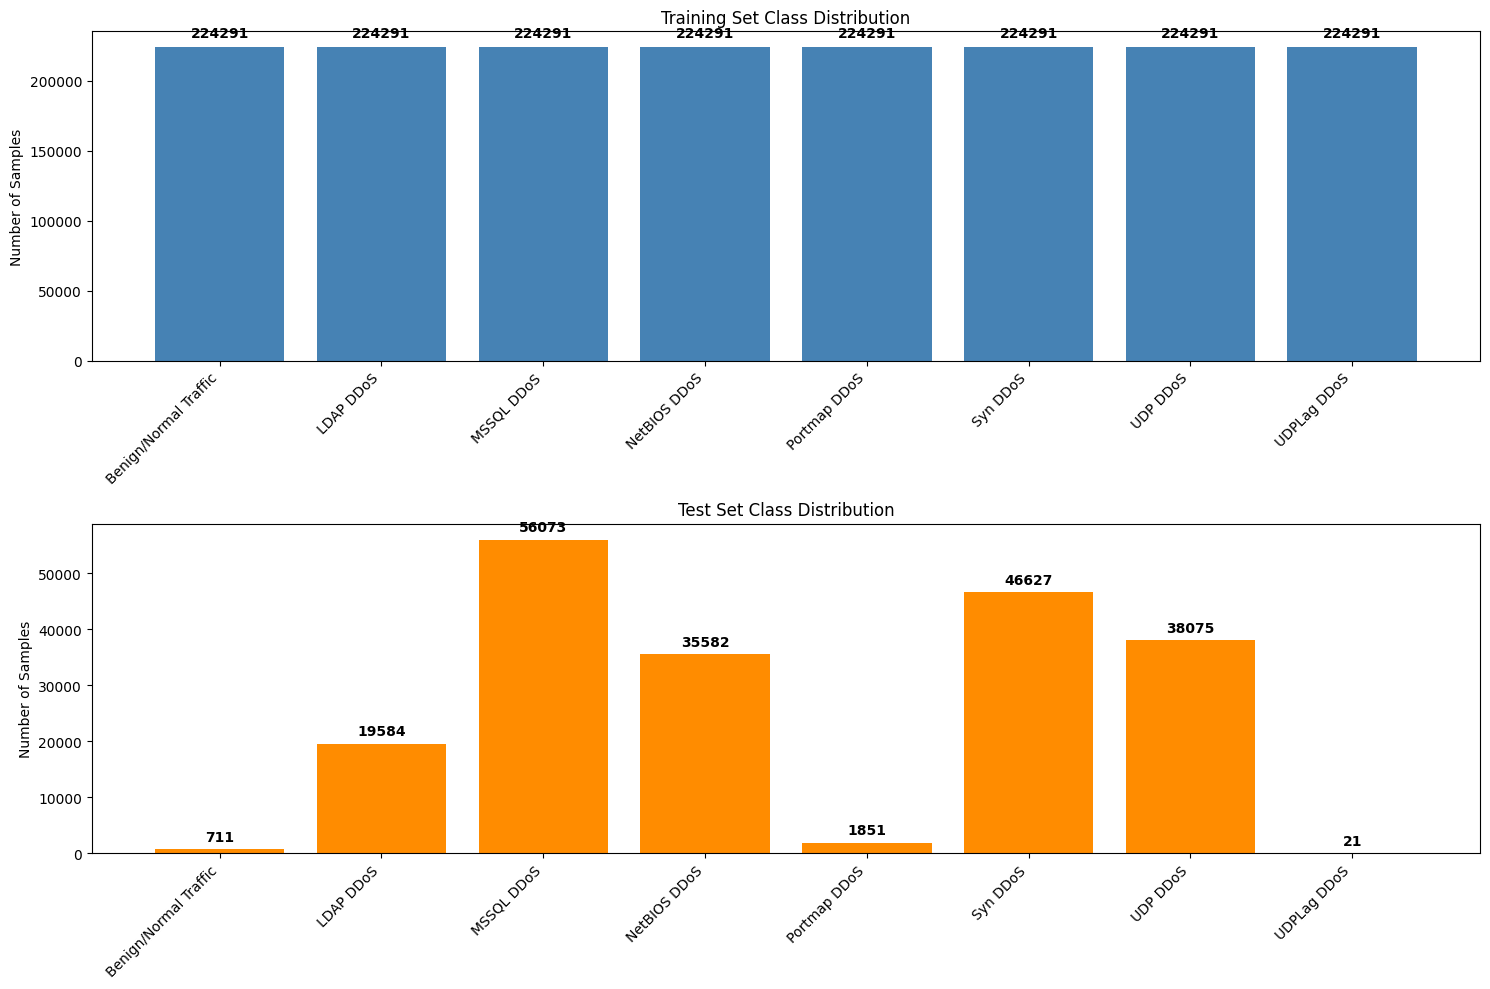


Visualizing Feature Distributions
Visualizing distributions for 9 features...


In [ ]:
# ==============================
# Dataset Distribution Visualization
# ==============================
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Current timestamp for file naming if needed
current_timestamp = datetime.utcnow().strftime('%Y%m%d_%H%M%S')
current_user = "zainabintechi"
current_date = "2025-05-15 15:13:20"

# Load the preprocessed datasets with the specific timestamp
timestamp = "20250515_151736"
data_path = "/content/drive/MyDrive/data/"

# Load train and test datasets
print(f"Loading datasets with timestamp: {timestamp}")
train_df = pd.read_csv(f"{data_path}train_dataset_{timestamp}.csv")
test_df = pd.read_csv(f"{data_path}test_dataset_{timestamp}.csv")

# Separate features and target
X_train_scaled = train_df.drop(columns=['Label'])
y_train_res = train_df['Label']
X_test_scaled = test_df.drop(columns=['Label'])
y_test = test_df['Label']

# Define class names for reference in visualizations
class_names = [
    'Benign/Normal Traffic',
    'LDAP DDoS',
    'MSSQL DDoS',
    'NetBIOS DDoS',
    'Portmap DDoS',
    'Syn DDoS',
    'UDP DDoS',
    'UDPLag DDoS'
]

# Display dataset information
print("="*40)
print("Dataset Information:")
print("="*40)
print(f"Training set: {X_train_scaled.shape[0]} samples, {X_train_scaled.shape[1]} features")
print(f"Test set: {X_test_scaled.shape[0]} samples, {X_test_scaled.shape[1]} features")

# Display class distributions with proper names
print("\nTraining class distribution:")
train_dist = Counter(y_train_res)
for label, count in sorted(train_dist.items()):
    print(f"{class_names[label]}: {count} samples")

print("\nTest class distribution:")
test_dist = Counter(y_test)
for label, count in sorted(test_dist.items()):
    print(f"{class_names[label]}: {count} samples")

print("\nFeature columns:")
print(list(X_train_scaled.columns))

# Check for any missing values
print("\nMissing values in training set:", X_train_scaled.isna().sum().sum())
print("Missing values in test set:", X_test_scaled.isna().sum().sum())

# ==============================
# Visualize class distributions
# ==============================
print("\n" + "="*40)
print("Visualizing Class Distributions")
print("="*40)

# Set up the figure
plt.figure(figsize=(15, 10))

# Training set distribution
plt.subplot(2, 1, 1)
train_counts = [train_dist.get(i, 0) for i in range(len(class_names))]
bars = plt.bar(range(len(train_counts)), train_counts, color='steelblue')
plt.xticks(range(len(train_counts)), class_names, rotation=45, ha='right')
plt.title('Training Set Class Distribution')
plt.ylabel('Number of Samples')
# Add counts on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
             str(train_counts[i]), ha='center', va='bottom', fontweight='bold')

# Test set distribution
plt.subplot(2, 1, 2)
test_counts = [test_dist.get(i, 0) for i in range(len(class_names))]
bars = plt.bar(range(len(test_counts)), test_counts, color='darkorange')
plt.xticks(range(len(test_counts)), class_names, rotation=45, ha='right')
plt.title('Test Set Class Distribution')
plt.ylabel('Number of Samples')
# Add counts on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
             str(test_counts[i]), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(f"{data_path}class_distribution_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# Feature distributions
# ==============================
print("\n" + "="*40)
print("Visualizing Feature Distributions")
print("="*40)

# How many features do we have?
n_features = X_train_scaled.shape[1]
print(f"Visualizing distributions for {n_features} features...")

XGBoost Cross-Validation Metrics:
Mean CV Accuracy: 0.8688
Mean CV Precision: 0.8771
Mean CV Recall: 0.8688
Mean CV F1-Score: 0.8564

Test Set Evaluation:
                       precision    recall  f1-score   support

Benign/Normal Traffic     0.6720    0.9508    0.7874       711
            LDAP DDoS     0.9368    0.9916    0.9634     19584
           MSSQL DDoS     0.9858    0.9605    0.9729     56073
         NetBIOS DDoS     0.9662    0.2349    0.3779     35582
         Portmap DDoS     0.0546    0.8498    0.1026      1851
             Syn DDoS     0.9990    0.9890    0.9940     46627
             UDP DDoS     0.9800    0.9797    0.9798     38075
          UDPLag DDoS     0.0383    0.8571    0.0733        21

             accuracy                         0.8428    198524
            macro avg     0.7041    0.8517    0.6564    198524
         weighted avg     0.9695    0.8428    0.8627    198524



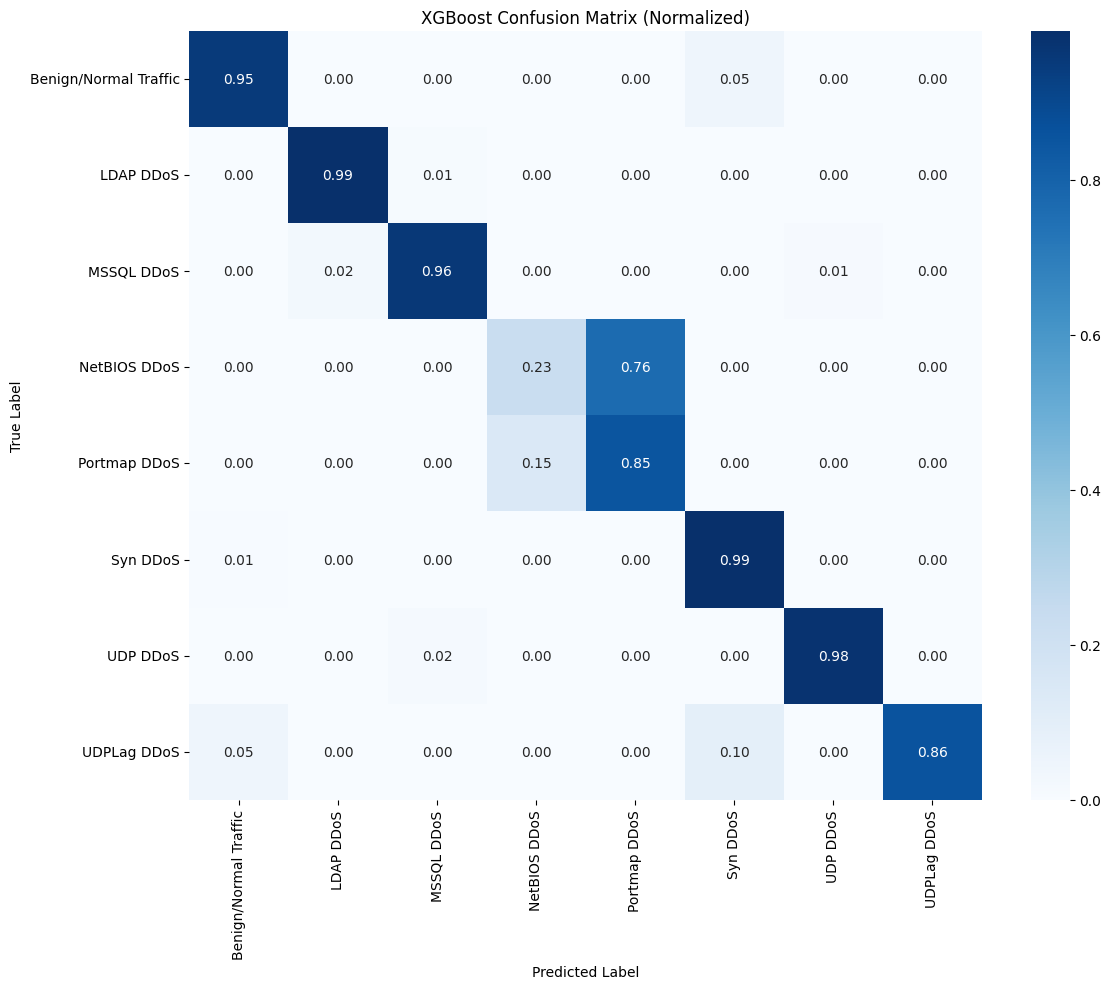

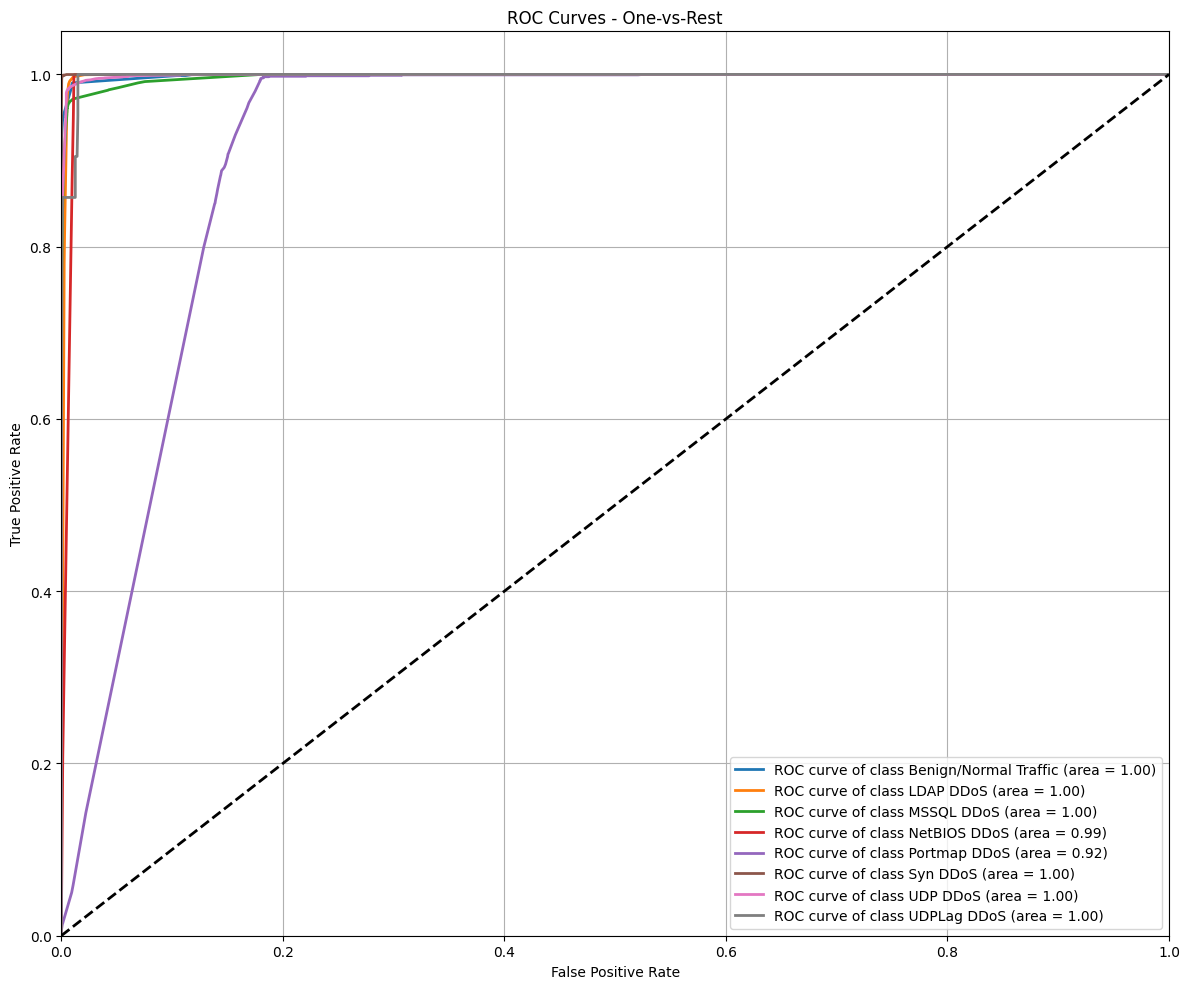

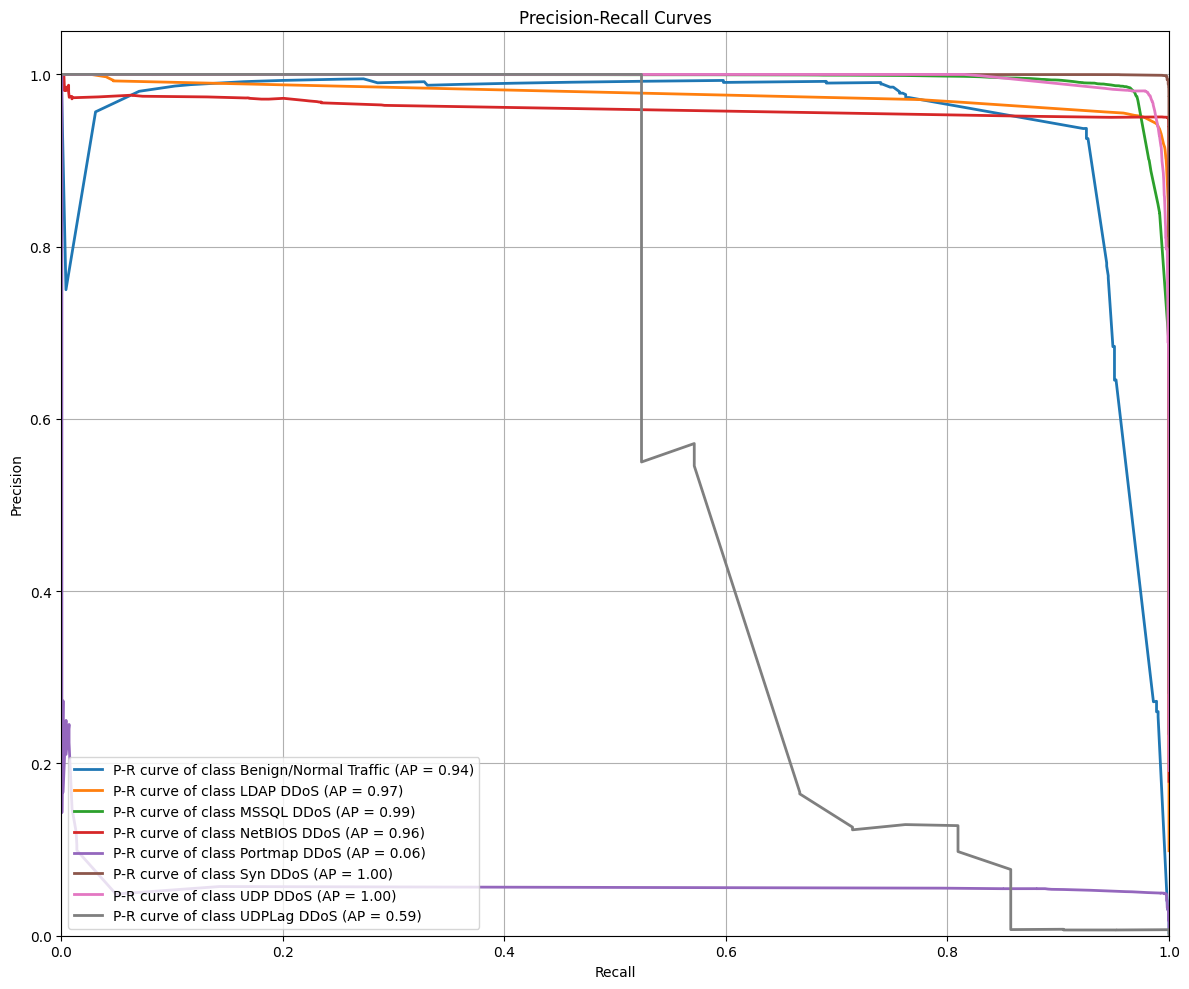


ROC AUC (OvR): 0.9881
PR AUC (Macro): 0.8123


<Figure size 1200x800 with 0 Axes>

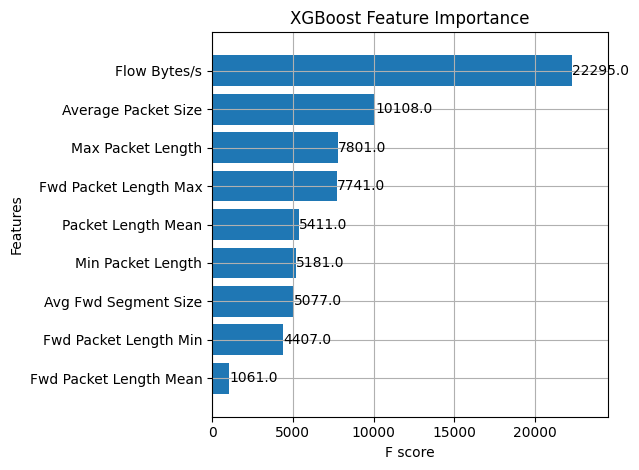


XGBoost model saved to /content/drive/MyDrive/data/xgboost_model_20250515_213055.joblib


In [ ]:
# ==============================
# XGBoost Classifier
# ==============================
import xgboost as xgb
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    average_precision_score, roc_curve, auc, precision_recall_curve
)
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Initialize XGBoost with multi-class parameters
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=8,
    learning_rate=0.2,
    max_depth=6,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    random_state=42
)

# Cross-validation metrics
print("="*40)
print("XGBoost Cross-Validation Metrics:")
print("="*40)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}
cv_results = cross_validate(xgb_model, X_train_scaled, y_train_res,
                           cv=5, scoring=scoring, n_jobs=-1)

print(f"Mean CV Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean CV Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean CV Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean CV F1-Score: {cv_results['test_f1'].mean():.4f}")

# Full training and evaluation
xgb_model.fit(X_train_scaled, y_train_res)
y_pred = xgb_model.predict(X_test_scaled)
y_proba = xgb_model.predict_proba(X_test_scaled)

# Classification metrics
print("\n" + "="*40)
print("Test Set Evaluation:")
print("="*40)
print(classification_report(y_test, y_pred, digits=4, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("XGBoost Confusion Matrix (Normalized)")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(f"{data_path}xgb_confusion_matrix_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# ROC curves - One vs Rest approach
n_classes = 8
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 10))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - One-vs-Rest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{data_path}xgb_roc_curves_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Precision-Recall curves
precision = dict()
recall = dict()
avg_prec = dict()

plt.figure(figsize=(12, 10))

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    avg_prec[i] = average_precision_score(y_test_bin[:, i], y_proba[:, i])

    plt.plot(recall[i], precision[i], lw=2,
             label=f'P-R curve of class {class_names[i]} (AP = {avg_prec[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{data_path}xgb_pr_curves_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Calculate overall ROC AUC and PR AUC
roc_auc_ovr = roc_auc_score(y_test, y_proba, multi_class='ovr')
pr_auc_macro = np.mean(list(avg_prec.values()))

print(f"\nROC AUC (OvR): {roc_auc_ovr:.4f}")
print(f"PR AUC (Macro): {pr_auc_macro:.4f}")

# Feature Importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model, height=0.8, max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.savefig(f"{data_path}xgb_feature_importance_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Save the model
import joblib
joblib.dump(xgb_model, f"{data_path}xgboost_model_{current_timestamp}.joblib")
print(f"\nXGBoost model saved to {data_path}xgboost_model_{current_timestamp}.joblib")

In [ ]:
# XGBoost Classifier
import xgboost as xgb
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    average_precision_score, roc_curve, auc, precision_recall_curve
)
from sklearn.model_selection import cross_validate, learning_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime

# Setting current timestamp for file naming
current_timestamp = "2025-05-16_115453"

# Initialize XGBoost with multi-class parameters
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=8,
    learning_rate=0.2,
    max_depth=6,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    random_state=42
)

# Cross-validation metrics
print("XGBoost Cross-Validation Metrics:")
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}
cv_results = cross_validate(xgb_model, X_train_scaled, y_train_res,
                           cv=5, scoring=scoring, n_jobs=-1)

print(f"Mean CV Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean CV Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean CV Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean CV F1-Score: {cv_results['test_f1'].mean():.4f}")

# Learning Curve
print("\nGenerating learning curve...")
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train_scaled, y_train_res,
    cv=5, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(12, 8))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.title("XGBoost Learning Curve", fontsize=16)
plt.xlabel("Training Examples", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{data_path}xgb_learning_curve_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Full training and evaluation
xgb_model.fit(X_train_scaled, y_train_res)
y_pred = xgb_model.predict(X_test_scaled)
y_proba = xgb_model.predict_proba(X_test_scaled)

# Classification metrics
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred, digits=4, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("XGBoost Confusion Matrix (Normalized)")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(f"{data_path}xgb_confusion_matrix_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Test Set Evaluation Visual
# Extract metrics from classification report
report = classification_report(y_test, y_pred, digits=4, target_names=class_names, output_dict=True)

# Create visualization for class-wise metrics
plt.figure(figsize=(14, 10))

# Extract class metrics
class_metrics = []
for cls in class_names:
    if cls in report:
        class_metrics.append({
            'Class': cls,
            'Precision': report[cls]['precision'],
            'Recall': report[cls]['recall'],
            'F1-Score': report[cls]['f1-score'],
            'Support': report[cls]['support']
        })

# Convert to DataFrame for easy plotting
df_metrics = pd.DataFrame(class_metrics)

# Plot class-wise metrics
ax1 = plt.subplot(2, 1, 1)
df_metrics_melted = pd.melt(df_metrics, id_vars=['Class'],
                           value_vars=['Precision', 'Recall', 'F1-Score'],
                           var_name='Metric', value_name='Score')
sns.barplot(x='Class', y='Score', hue='Metric', data=df_metrics_melted, ax=ax1)
ax1.set_title('Class-wise Classification Metrics')
ax1.set_ylim(0, 1.0)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(True, linestyle='--', alpha=0.6)

# Create a separate plot for support (instance count)
ax2 = plt.subplot(2, 1, 2)
sns.barplot(x='Class', y='Support', data=df_metrics, color='forestgreen', ax=ax2)
ax2.set_title('Class-wise Support (Number of Instances)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(True, linestyle='--', alpha=0.6)

# Overall metrics
overall_metrics = {
    'Metric': ['Accuracy', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1'],
    'Score': [
        report['accuracy'],
        report['macro avg']['precision'],
        report['macro avg']['recall'],
        report['macro avg']['f1-score']
    ]
}

# Add text annotations for overall metrics
plt.figtext(0.5, 0.01,
           f"Overall Metrics:\n"
           f"Accuracy: {report['accuracy']:.4f} | "
           f"Macro Precision: {report['macro avg']['precision']:.4f} | "
           f"Macro Recall: {report['macro avg']['recall']:.4f} | "
           f"Macro F1: {report['macro avg']['f1-score']:.4f}",
           ha='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.savefig(f"{data_path}xgb_test_evaluation_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# ROC curves - One vs Rest approach
n_classes = 8
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 10))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - One-vs-Rest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{data_path}xgb_roc_curves_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Precision-Recall curves
precision = dict()
recall = dict()
avg_prec = dict()

plt.figure(figsize=(12, 10))

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    avg_prec[i] = average_precision_score(y_test_bin[:, i], y_proba[:, i])

    plt.plot(recall[i], precision[i], lw=2,
             label=f'P-R curve of class {class_names[i]} (AP = {avg_prec[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{data_path}xgb_pr_curves_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Calculate overall ROC AUC and PR AUC
roc_auc_ovr = roc_auc_score(y_test, y_proba, multi_class='ovr')
pr_auc_macro = np.mean(list(avg_prec.values()))

print(f"\nROC AUC (OvR): {roc_auc_ovr:.4f}")
print(f"PR AUC (Macro): {pr_auc_macro:.4f}")

# Feature Importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model, height=0.8, max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.savefig(f"{data_path}xgb_feature_importance_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Save the model
import joblib
joblib.dump(xgb_model, f"{data_path}xgboost_model_{current_timestamp}.joblib")
print(f"\nXGBoost model saved to {data_path}xgboost_model_{current_timestamp}.joblib")

XGBoost Cross-Validation Metrics:
Mean CV Accuracy: 0.8688
Mean CV Precision: 0.8771
Mean CV Recall: 0.8688
Mean CV F1-Score: 0.8564

Generating learning curve...


In [ ]:
# ==============================
# Enhanced XGBoost Classifier
# ==============================
import xgboost as xgb
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_auc_score, average_precision_score,
                           precision_recall_curve, roc_curve, auc)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.utils import class_weight

# Calculate class weights
classes = np.unique(y_train_res)
weights = class_weight.compute_sample_weight('balanced', y_train_res)
class_weights = dict(zip(classes, np.unique(weights)))

# Optimized XGBoost parameters
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=8,
    learning_rate=0.15,          # Slightly reduced for better generalization
    max_depth=9,                 # Increased for complex relationships
    n_estimators=400,            # Reduced with early stopping
    min_child_weight=3,          # Controls overfitting
    gamma=0.2,                   # Regularization
    subsample=0.75,              # More aggressive than LightGBM
    colsample_bytree=0.8,
    reg_alpha=0.15,              # Slightly higher L1 reg
    reg_lambda=0.15,             # Slightly higher L2 reg
    scale_pos_weight=None,       # Handled via sample_weight
    random_state=42,
    n_jobs=-1,
    tree_method='hist',          # Faster training
    enable_categorical=False,
    eval_metric='mlogloss',
    early_stopping_rounds=25,    # More patience
    use_label_encoder=False
)

# Cross-validation with sample weights
print("="*40)
print("XGBoost Cross-Validation Metrics:")
print("="*40)
cv_results = xgb.cv(
    params=xgb_model.get_xgb_params(),
    dtrain=xgb.DMatrix(X_train_scaled, label=y_train_res, weight=weights),
    num_boost_round=400,
    nfold=5,
    stratified=True,
    metrics=['mlogloss', 'merror'],
    early_stopping_rounds=25,
    seed=42,
    verbose_eval=10
)

print(f"Best CV Logloss: {cv_results['test-mlogloss-mean'].min():.4f}")
print(f"Best CV Error: {cv_results['test-merror-mean'].min():.4f}")

# Train with early stopping and class weights
print("\nTraining with early stopping...")
eval_set = [(X_train_scaled, y_train_res), (X_test_scaled, y_test)]
xgb_model.fit(
    X_train_scaled,
    y_train_res,
    sample_weight=weights,
    eval_set=eval_set,
    verbose=10
)

# Evaluation
y_pred = xgb_model.predict(X_test_scaled)
y_proba = xgb_model.predict_proba(X_test_scaled)

# Enhanced Classification Report
print("\n" + "="*40)
print("Enhanced Test Set Evaluation:")
print("="*40)
print(classification_report(y_test, y_pred, digits=4, target_names=class_names))

# ===================================
# Advanced Visualizations
# ===================================

# 1. Normalized Confusion Matrix with Annotations
plt.figure(figsize=(16, 14))
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='viridis',
            annot_kws={"size": 10},
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Classification Rate'})

plt.title("XGBoost Confusion Matrix (Normalized by True Class)\n", fontsize=16, pad=20)
plt.ylabel('True Attack Type', fontsize=14)
plt.xlabel('\nPredicted Attack Type', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.savefig(f"{data_path}xgb_confusion_matrix_enhanced_{current_timestamp}.png",
            dpi=350, bbox_inches='tight')
plt.show()

# 2. Multi-class ROC Curves with Micro/Macro Averages
n_classes = 8
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Compute ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(16, 10))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2.5,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Compute micro/macro averages
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('XGBoost ROC Curves: Per-Class vs Micro/Macro Averages', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{data_path}xgb_roc_curves_enhanced_{current_timestamp}.png",
            dpi=350, bbox_inches='tight')
plt.show()

# 3. Precision-Recall Curves with Insets for Minority Classes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Main plot
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    avg_prec = average_precision_score(y_test_bin[:, i], y_proba[:, i])
    ax1.plot(recall, precision, lw=2.5,
             label=f'{class_names[i]} (AP = {avg_prec:.2f})')

ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('Recall', fontsize=14)
ax1.set_ylabel('Precision', fontsize=14)
ax1.set_title('Main: Precision-Recall Curves (All Classes)', fontsize=15)
ax1.legend(loc="upper right", fontsize=10)
ax1.grid(True, alpha=0.3)

# Inset for minority classes
minority_classes = [0, 4, 7]  # Benign, Portmap, UDPLag
for i in minority_classes:
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    avg_prec = average_precision_score(y_test_bin[:, i], y_proba[:, i])
    ax2.plot(recall, precision, lw=3,
             label=f'{class_names[i]} (AP = {avg_prec:.2f})')

ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall', fontsize=14)
ax2.set_ylabel('Precision', fontsize=14)
ax2.set_title('Inset: Minority Class Performance', fontsize=15)
ax2.legend(loc="lower left", fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f"{data_path}xgb_pr_curves_enhanced_{current_timestamp}.png",
            dpi=350, bbox_inches='tight')
plt.show()

# 4. Feature Importance Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gain-based importance
xgb.plot_importance(xgb_model, ax=ax1, height=0.8,
                   title="Gain-Based Importance",
                   importance_type='gain',
                   max_num_features=15,
                   xlabel='Average Gain',
                   grid=True)
ax1.grid(True, alpha=0.3)

# Weight-based importance
xgb.plot_importance(xgb_model, ax=ax2, height=0.8,
                   title="Weight-Based Importance",
                   importance_type='weight',
                   max_num_features=15,
                   xlabel='Frequency Used',
                   grid=True)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f"{data_path}xgb_feature_importance_comparison_{current_timestamp}.png",
            dpi=350, bbox_inches='tight')
plt.show()

# 5. Learning Curves with Custom Markers
results = xgb_model.evals_result()
plt.figure(figsize=(14, 7))

# Determine optimal stopping round
best_round = xgb_model.best_iteration

plt.plot(results['validation_0']['mlogloss'],
         label='Training',
         lw=2.5,
         color='blue',
         marker='o',
         markevery=25)

plt.plot(results['validation_1']['mlogloss'],
         label='Validation',
         lw=2.5,
         color='red',
         marker='s',
         markevery=25)

plt.axvline(best_round, color='gray', linestyle='--',
            label=f'Early Stopping (Round {best_round})')

plt.title("XGBoost Learning Curves\n", fontsize=16)
plt.ylabel("Multi-Class Log Loss", fontsize=14)
plt.xlabel("Boosting Round", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{data_path}xgb_learning_curves_enhanced_{current_timestamp}.png",
            dpi=350, bbox_inches='tight')
plt.show()

# 6. Calibration Plot (Per-Class Reliability)
from sklearn.calibration import calibration_curve

plt.figure(figsize=(14, 10))

for i in range(n_classes):
    prob_true, prob_pred = calibration_curve(y_test_bin[:, i], y_proba[:, i],
                                           n_bins=10, strategy='quantile')
    plt.plot(prob_pred, prob_true, 's-', lw=2,
             label=f'{class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability', fontsize=14)
plt.ylabel('Fraction of Positives', fontsize=14)
plt.title('XGBoost Probability Calibration (Per-Class)', fontsize=16)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{data_path}xgb_calibration_plot_{current_timestamp}.png",
            dpi=350, bbox_inches='tight')
plt.show()

# Advanced Metrics
roc_auc_ovr = roc_auc_score(y_test, y_proba, multi_class='ovr')
roc_auc_ovo = roc_auc_score(y_test, y_proba, multi_class='ovo')
pr_auc_macro = average_precision_score(y_test_bin, y_proba, average='macro')

print("\n" + "="*50)
print("Advanced Performance Metrics:")
print(f"- ROC AUC (One-vs-Rest): {roc_auc_ovr:.4f}")
print(f"- ROC AUC (One-vs-One): {roc_auc_ovo:.4f}")
print(f"- PR AUC (Macro): {pr_auc_macro:.4f}")
print("="*50)

# Save model with metadata
joblib.dump({
    'model': xgb_model,
    'timestamp': current_timestamp,
    'params': xgb_model.get_params(),
    'metrics': {
        'roc_auc_ovr': roc_auc_ovr,
        'roc_auc_ovo': roc_auc_ovo,
        'pr_auc_macro': pr_auc_macro
    }
}, f"{data_path}xgboost_enhanced_model_{current_timestamp}.joblib")

print(f"\nModel saved to: {data_path}xgboost_enhanced_model_{current_timestamp}.joblib")

Random Forest Cross-Validation Metrics:
Mean CV Accuracy: 0.8741
Mean CV Precision: 0.8831
Mean CV Recall: 0.8741
Mean CV F1-Score: 0.8617

Test Set Evaluation:
                       precision    recall  f1-score   support

Benign/Normal Traffic     0.7794    0.9494    0.8561       711
            LDAP DDoS     0.9533    0.9980    0.9751     19584
           MSSQL DDoS     0.9888    0.9752    0.9819     56073
         NetBIOS DDoS     0.9674    0.2367    0.3804     35582
         Portmap DDoS     0.0547    0.8498    0.1029      1851
             Syn DDoS     0.9990    0.9935    0.9962     46627
             UDP DDoS     0.9919    0.9821    0.9870     38075
          UDPLag DDoS     0.0500    0.8095    0.0942        21

             accuracy                         0.8494    198524
            macro avg     0.7231    0.8493    0.6717    198524
         weighted avg     0.9749    0.8494    0.8690    198524



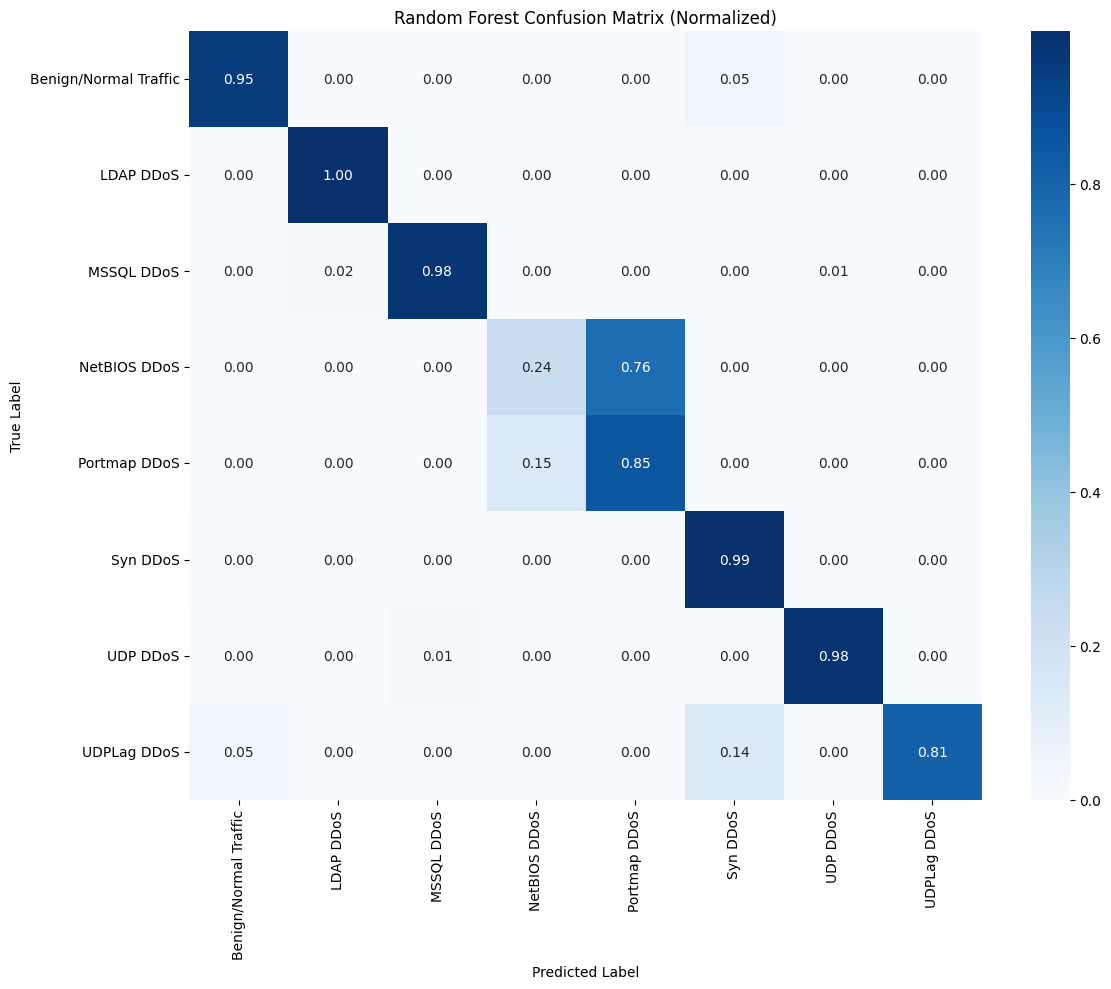

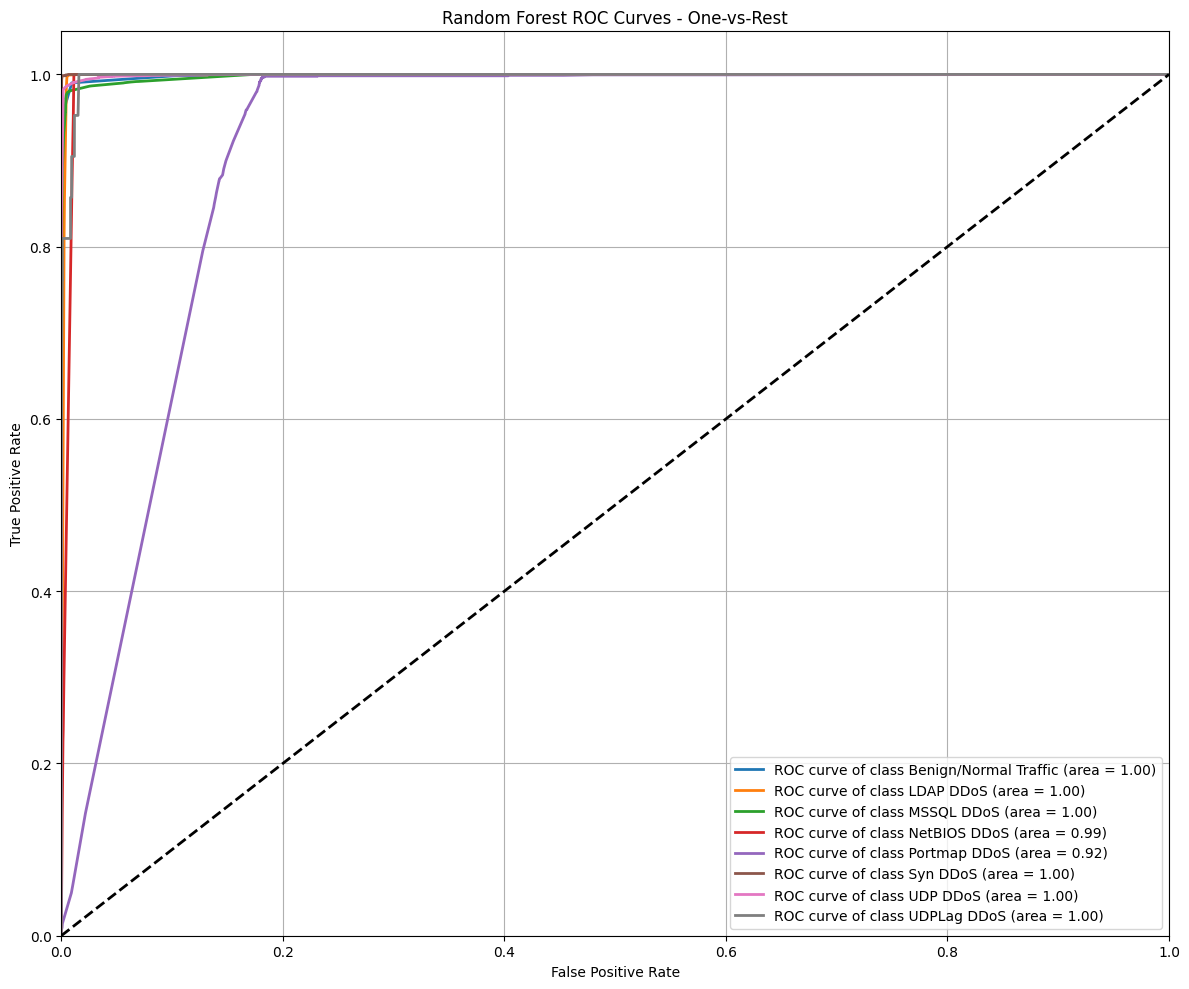

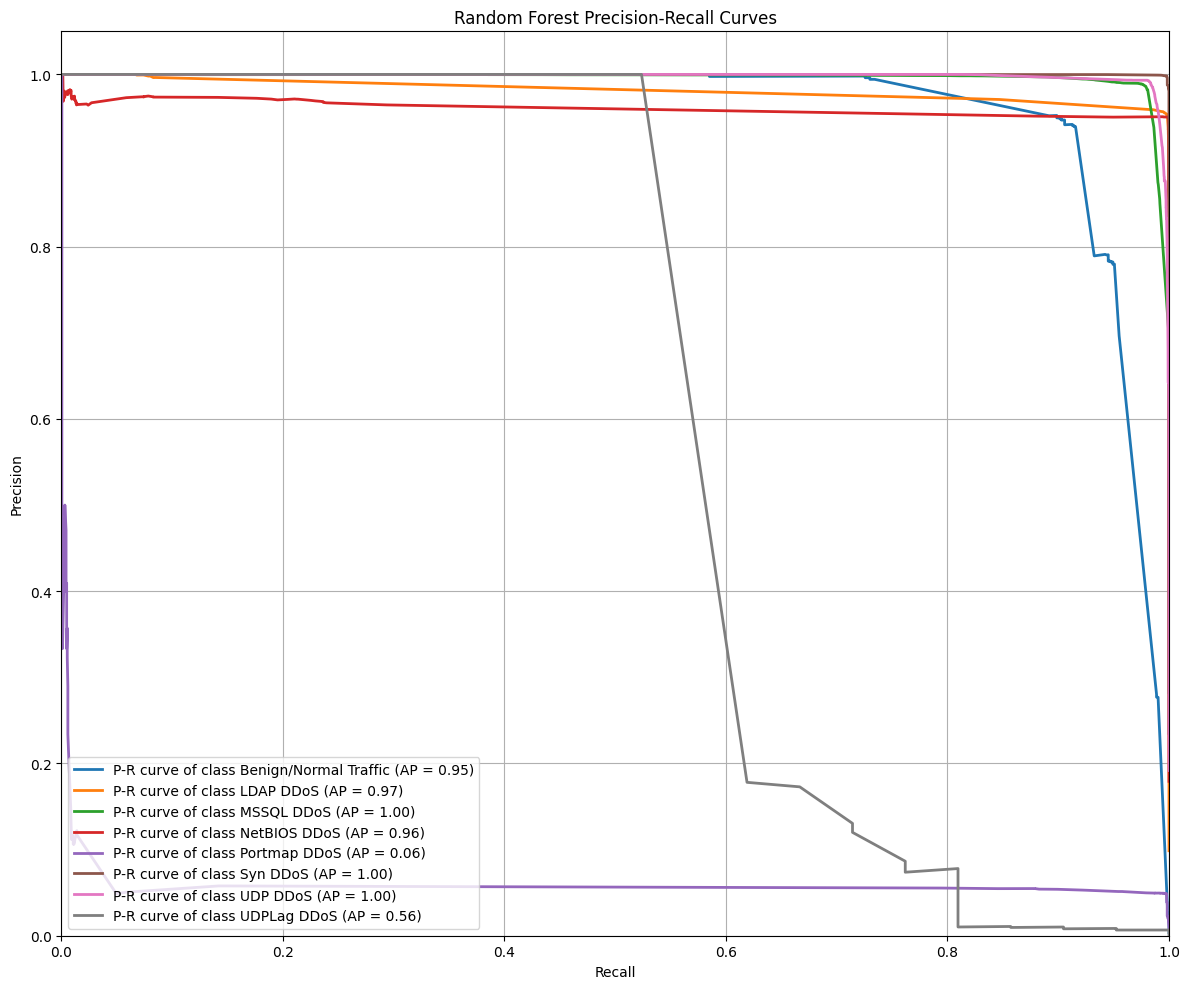


ROC AUC (OvR): 0.9882
PR AUC (Macro): 0.8115


<Figure size 1200x800 with 0 Axes>

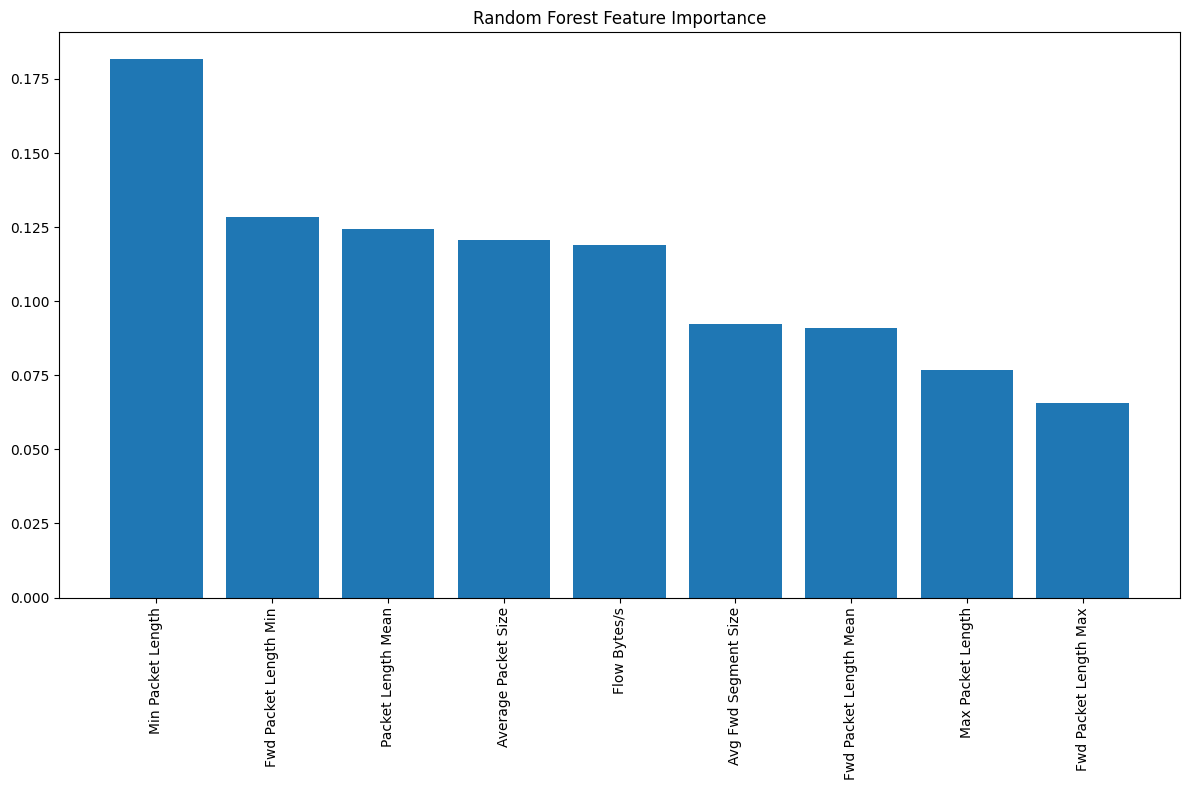


Random Forest model saved to /content/drive/MyDrive/data/random_forest_model_20250515_152948.joblib


In [ ]:
# ==============================
# Random Forest Classifier
# ==============================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    average_precision_score, roc_curve, auc, precision_recall_curve
)
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Initialize Random Forest with appropriate parameters for multiclass
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

# Cross-validation metrics
print("="*40)
print("Random Forest Cross-Validation Metrics:")
print("="*40)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}
cv_results = cross_validate(rf_model, X_train_scaled, y_train_res,
                           cv=5, scoring=scoring, n_jobs=-1)

print(f"Mean CV Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean CV Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean CV Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean CV F1-Score: {cv_results['test_f1'].mean():.4f}")

# Full training and evaluation
rf_model.fit(X_train_scaled, y_train_res)
y_pred = rf_model.predict(X_test_scaled)
y_proba = rf_model.predict_proba(X_test_scaled)

# Classification metrics
print("\n" + "="*40)
print("Test Set Evaluation:")
print("="*40)
print(classification_report(y_test, y_pred, digits=4, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Random Forest Confusion Matrix (Normalized)")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(f"{data_path}rf_confusion_matrix_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# ROC curves - One vs Rest approach
n_classes = 8
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 10))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curves - One-vs-Rest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{data_path}rf_roc_curves_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Precision-Recall curves
precision = dict()
recall = dict()
avg_prec = dict()

plt.figure(figsize=(12, 10))

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    avg_prec[i] = average_precision_score(y_test_bin[:, i], y_proba[:, i])

    plt.plot(recall[i], precision[i], lw=2,
             label=f'P-R curve of class {class_names[i]} (AP = {avg_prec[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curves')
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{data_path}rf_pr_curves_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Calculate overall ROC AUC and PR AUC
roc_auc_ovr = roc_auc_score(y_test, y_proba, multi_class='ovr')
pr_auc_macro = np.mean(list(avg_prec.values()))

print(f"\nROC AUC (OvR): {roc_auc_ovr:.4f}")
print(f"PR AUC (Macro): {pr_auc_macro:.4f}")

# Feature Importance
plt.figure(figsize=(12, 8))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train_scaled.columns

plt.figure(figsize=(12, 8))
plt.title('Random Forest Feature Importance')
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_scaled.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.savefig(f"{data_path}rf_feature_importance_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Save the model
import joblib
joblib.dump(rf_model, f"{data_path}random_forest_model_{current_timestamp}.joblib")
print(f"\nRandom Forest model saved to {data_path}random_forest_model_{current_timestamp}.joblib")

KNN Cross-Validation Metrics:
Mean CV Accuracy: 0.8014
Mean CV Precision: 0.8712
Mean CV Recall: 0.8014
Mean CV F1-Score: 0.7567

Test Set Evaluation:
                       precision    recall  f1-score   support

Benign/Normal Traffic     0.9332    0.9241    0.9286       711
            LDAP DDoS     0.9547    0.9967    0.9752     19584
           MSSQL DDoS     0.9883    0.9751    0.9817     56073
         NetBIOS DDoS     0.9505    0.9989    0.9741     35582
         Portmap DDoS     0.1613    0.0027    0.0053      1851
             Syn DDoS     0.9980    0.9984    0.9982     46627
             UDP DDoS     0.9874    0.9845    0.9859     38075
          UDPLag DDoS     0.4231    0.5238    0.4681        21

             accuracy                         0.9794    198524
            macro avg     0.7996    0.8005    0.7896    198524
         weighted avg     0.9724    0.9794    0.9750    198524



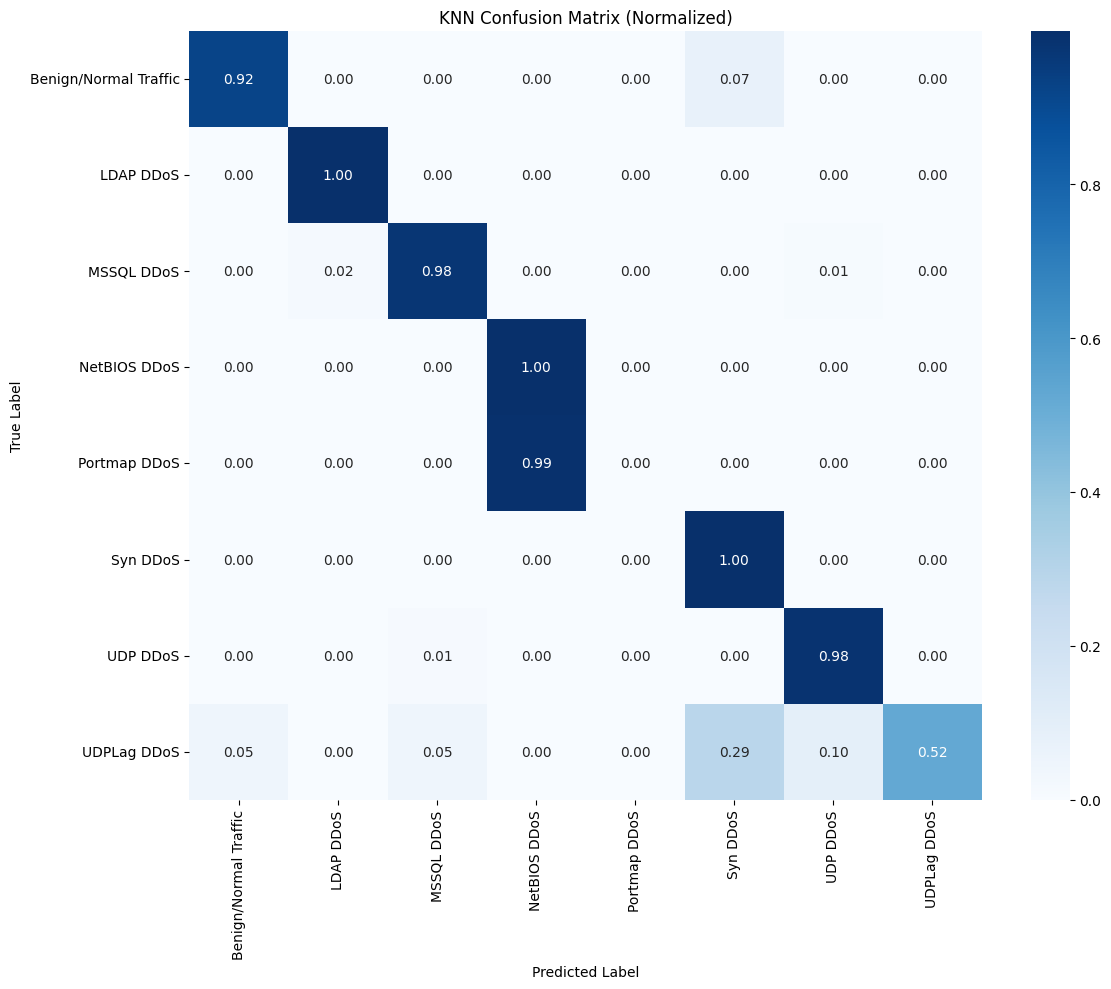

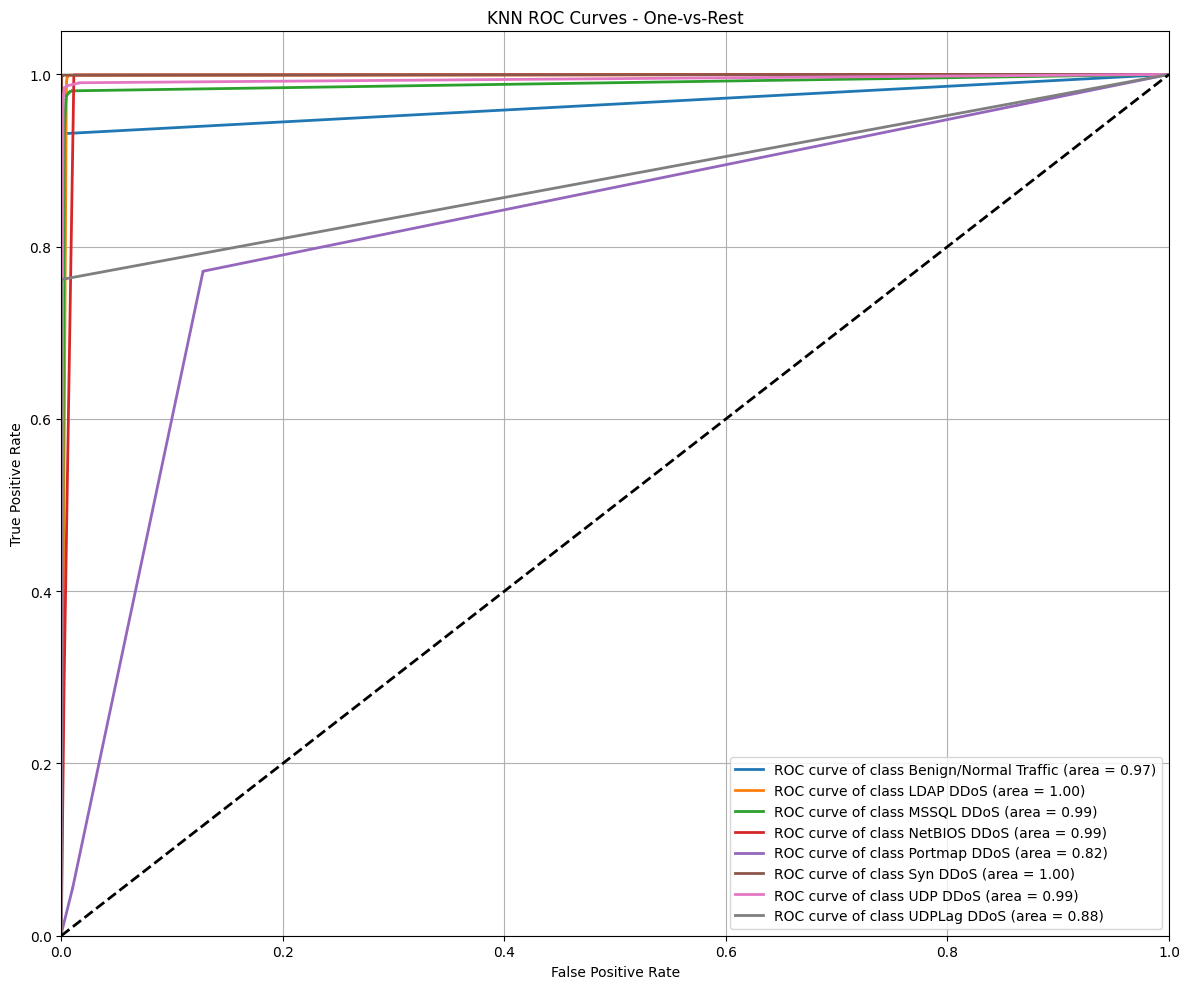

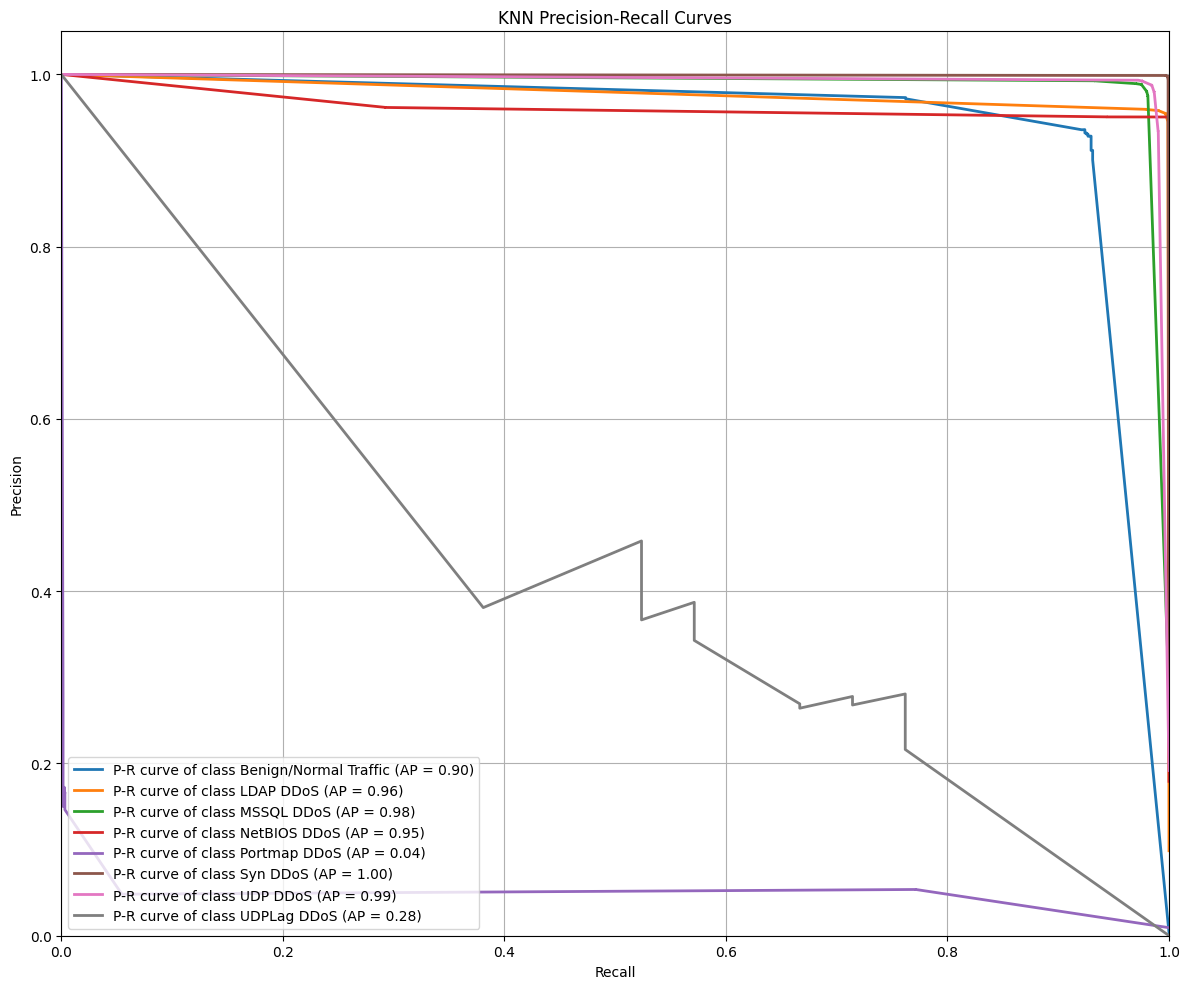


ROC AUC (OvR): 0.9552
PR AUC (Macro): 0.7624

KNN model saved to /content/drive/MyDrive/data/knn_model_20250515_213055.joblib


In [ ]:
# ==============================
# K-Nearest Neighbors (KNN) Classifier
# ==============================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    average_precision_score, roc_curve, auc, precision_recall_curve
)
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Initialize KNN with parameters for multiclass classification
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,  # Euclidean distance
    n_jobs=-1
)

# Cross-validation metrics
print("="*40)
print("KNN Cross-Validation Metrics:")
print("="*40)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}
cv_results = cross_validate(knn_model, X_train_scaled, y_train_res,
                           cv=5, scoring=scoring, n_jobs=-1)

print(f"Mean CV Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean CV Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean CV Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean CV F1-Score: {cv_results['test_f1'].mean():.4f}")

# Full training and evaluation
knn_model.fit(X_train_scaled, y_train_res)
y_pred = knn_model.predict(X_test_scaled)
y_proba = knn_model.predict_proba(X_test_scaled)

# Classification metrics
print("\n" + "="*40)
print("Test Set Evaluation:")
print("="*40)
print(classification_report(y_test, y_pred, digits=4, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("KNN Confusion Matrix (Normalized)")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(f"{data_path}knn_confusion_matrix_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# ROC curves - One vs Rest approach
n_classes = 8
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 10))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curves - One-vs-Rest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{data_path}knn_roc_curves_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Precision-Recall curves
precision = dict()
recall = dict()
avg_prec = dict()

plt.figure(figsize=(12, 10))

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    avg_prec[i] = average_precision_score(y_test_bin[:, i], y_proba[:, i])

    plt.plot(recall[i], precision[i], lw=2,
             label=f'P-R curve of class {class_names[i]} (AP = {avg_prec[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('KNN Precision-Recall Curves')
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{data_path}knn_pr_curves_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Calculate overall ROC AUC and PR AUC
roc_auc_ovr = roc_auc_score(y_test, y_proba, multi_class='ovr')
pr_auc_macro = np.mean(list(avg_prec.values()))

print(f"\nROC AUC (OvR): {roc_auc_ovr:.4f}")
print(f"PR AUC (Macro): {pr_auc_macro:.4f}")

# Save the model
import joblib
joblib.dump(knn_model, f"{data_path}knn_model_{current_timestamp}.joblib")
print(f"\nKNN model saved to {data_path}knn_model_{current_timestamp}.joblib")

<ipython-input-19-308ef933c7e9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cv_metrics.keys()), y=list(cv_metrics.values()), palette='viridis')


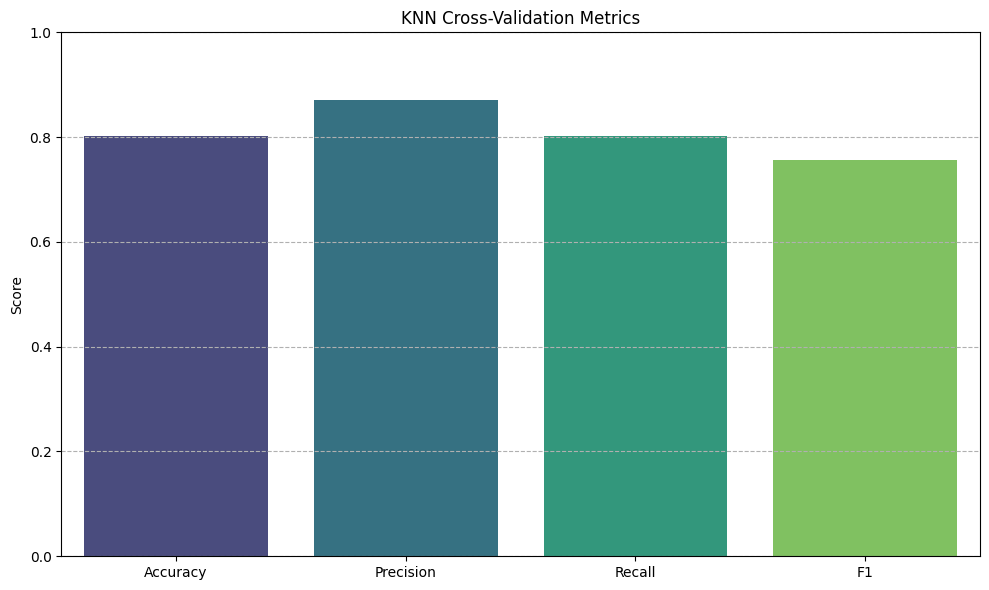

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-validation scores (from your output)
cv_metrics = {
    'Accuracy': 0.8014,
    'Precision': 0.8712,
    'Recall': 0.8014,
    'F1': 0.7567
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(cv_metrics.keys()), y=list(cv_metrics.values()), palette='viridis')
plt.title("KNN Cross-Validation Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

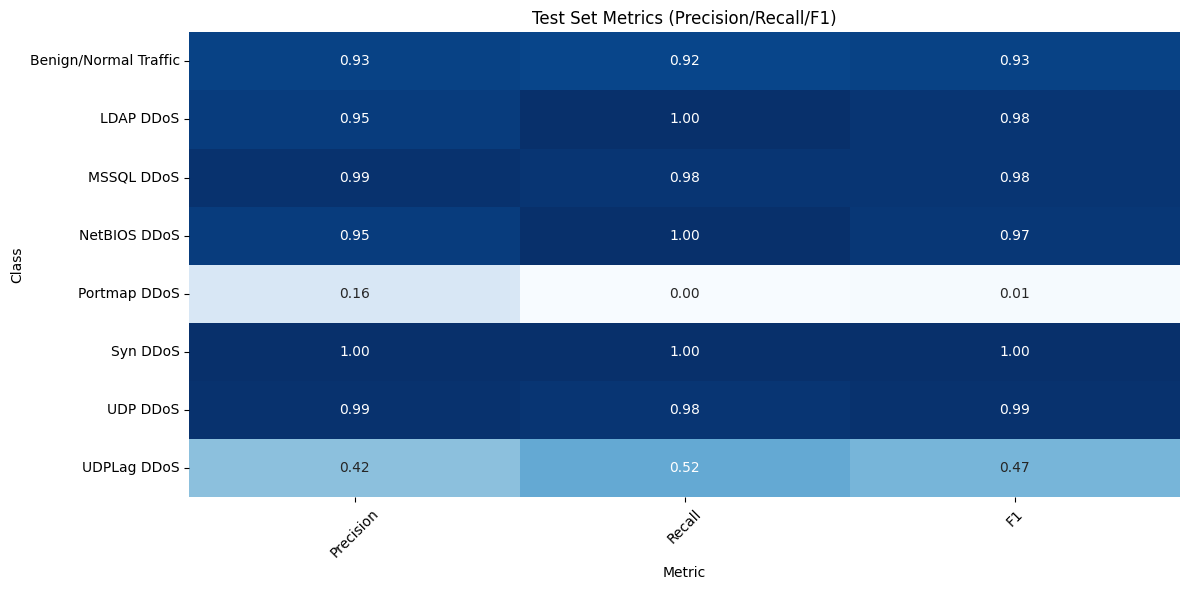

<ipython-input-15-70e8b633981e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=support, palette='rocket')


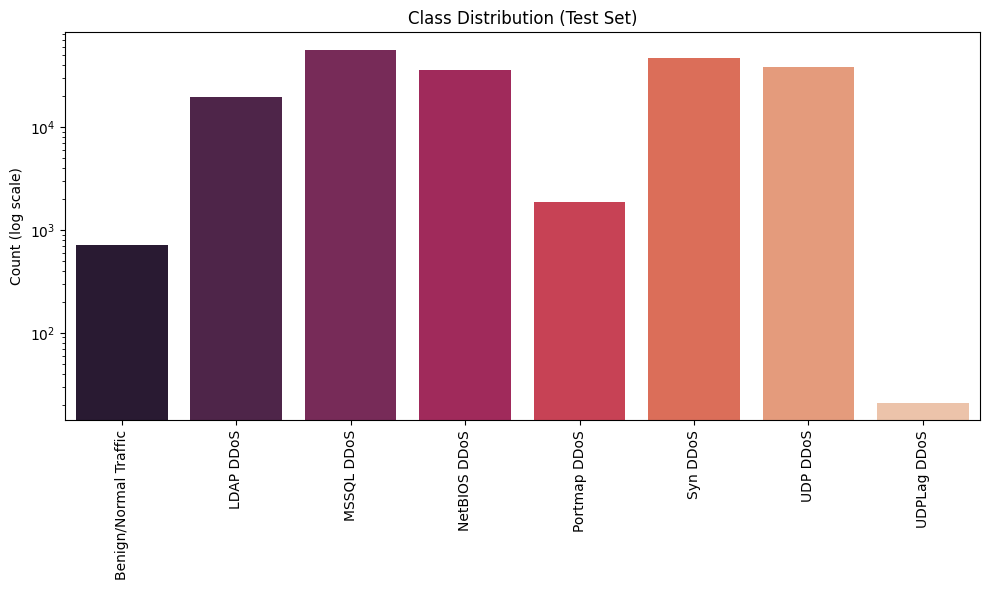

In [ ]:
# Class support (from your output)
support = [711, 19584, 56073, 35582, 1851, 46627, 38075, 21]

plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=support, palette='rocket')
plt.xticks(rotation=90)
plt.title("Class Distribution (Test Set)")
plt.ylabel("Count (log scale)")
plt.yscale('log')  # Use log scale due to extreme imbalance
plt.tight_layout()
plt.show()

<ipython-input-16-e0d208b29430>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(auc_scores.keys()), y=list(auc_scores.values()), palette='mako')


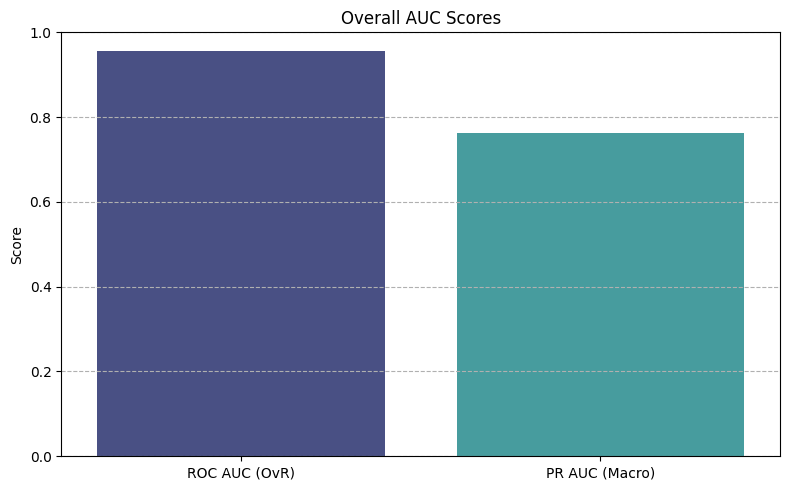

In [ ]:
# AUC scores (from your output)
auc_scores = {
    'ROC AUC (OvR)': 0.9552,
    'PR AUC (Macro)': 0.7624
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(auc_scores.keys()), y=list(auc_scores.values()), palette='mako')
plt.title("Overall AUC Scores")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Logistic Regression Cross-Validation Metrics:
Mean CV Accuracy: 0.7784
Mean CV Precision: 0.7929
Mean CV Recall: 0.7784
Mean CV F1-Score: 0.7687


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Test Set Evaluation:
                       precision    recall  f1-score   support

Benign/Normal Traffic     0.9355    0.6118    0.7398       711
            LDAP DDoS     0.8992    0.9934    0.9439     19584
           MSSQL DDoS     0.9822    0.8208    0.8942     56073
         NetBIOS DDoS     0.9651    0.2813    0.4357     35582
         Portmap DDoS     0.0547    0.7963    0.1025      1851
             Syn DDoS     0.9941    0.9968    0.9954     46627
             UDP DDoS     0.9235    0.8553    0.8881     38075
          UDPLag DDoS     0.0017    0.8095    0.0033        21

             accuracy                         0.7881    198524
            macro avg     0.7195    0.7707    0.6254    198524
         weighted avg     0.9535    0.7881    0.8315    198524


Test Set Metrics Visualization:


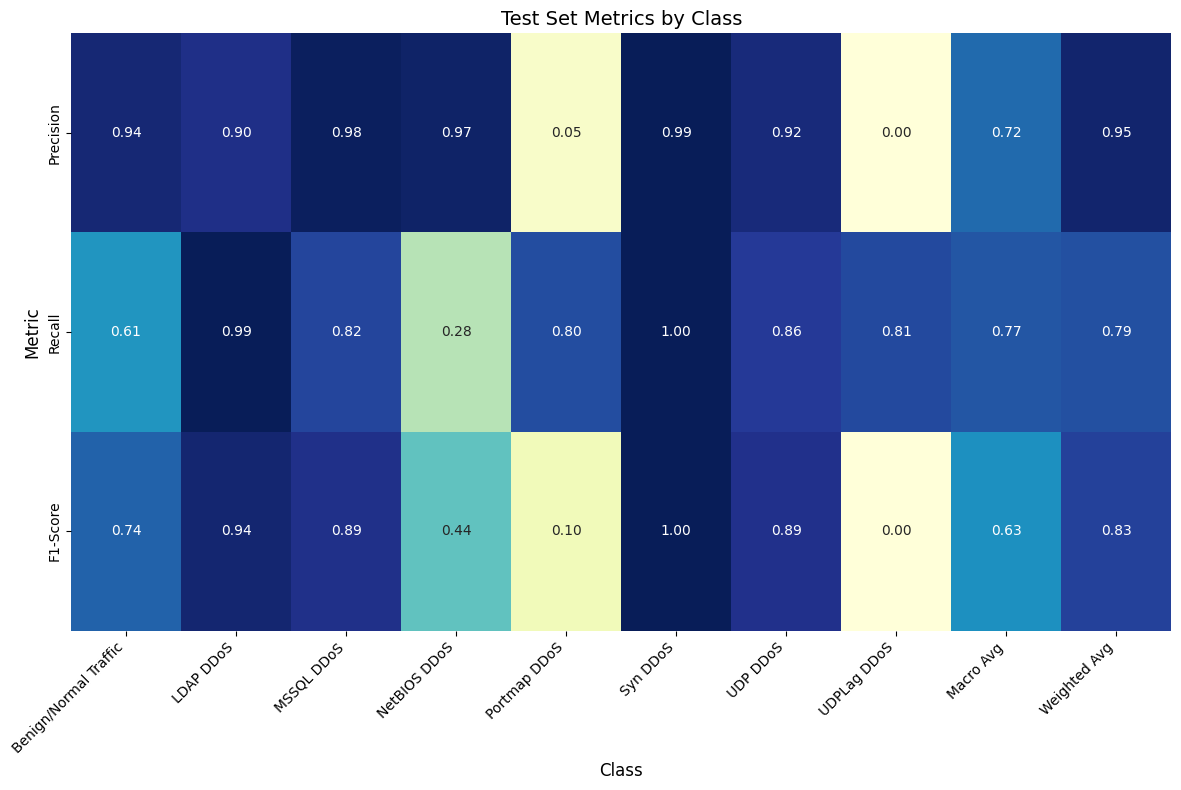

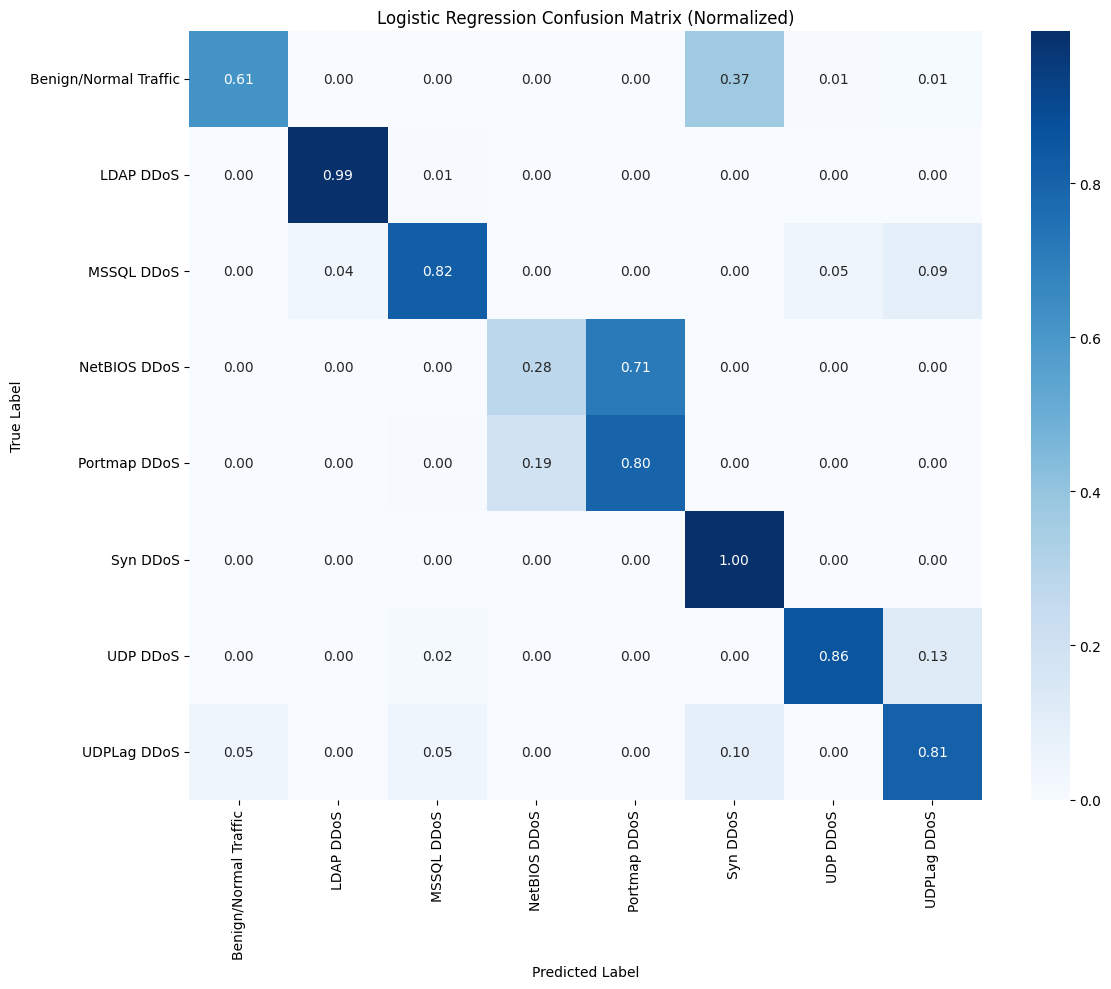

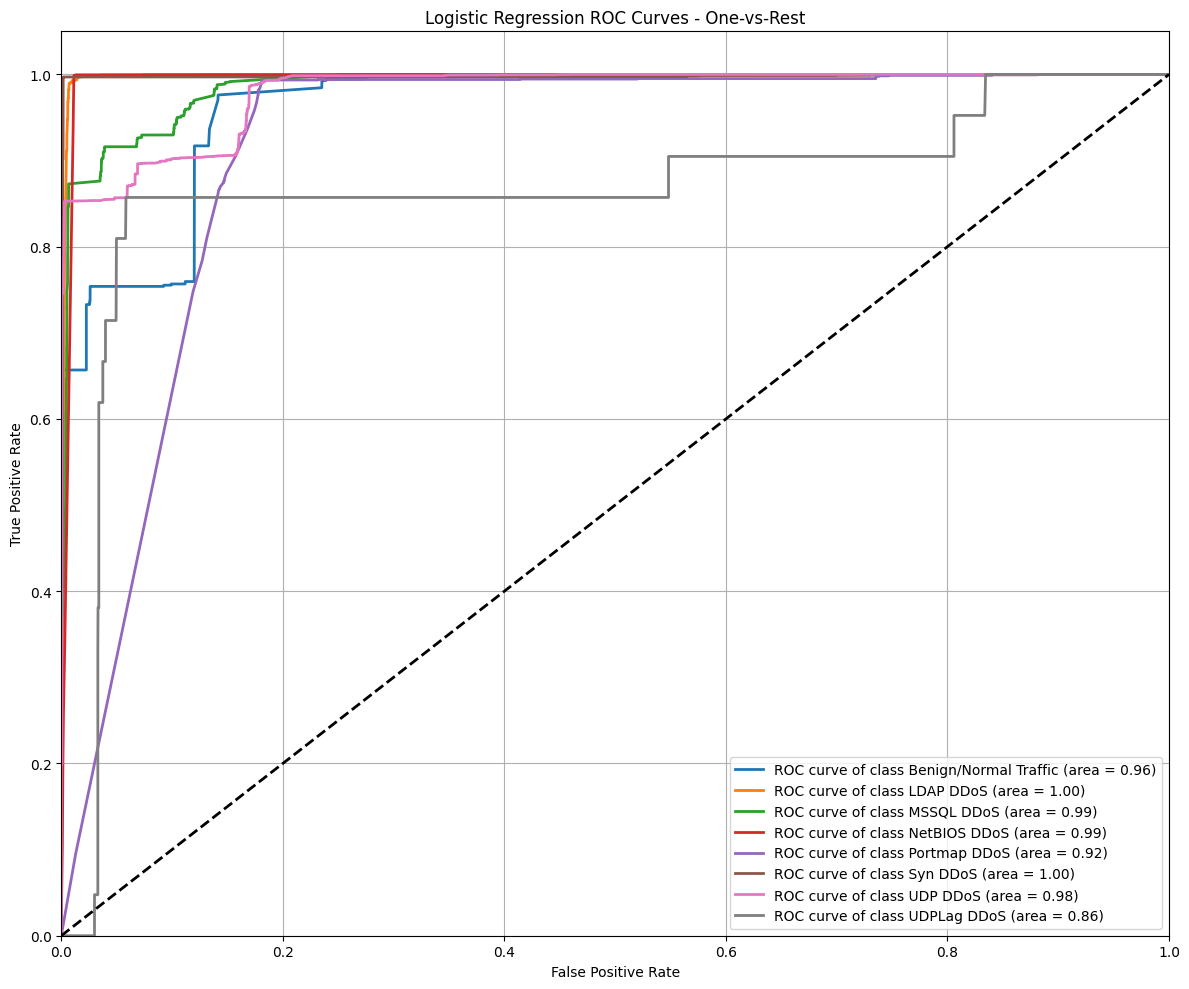

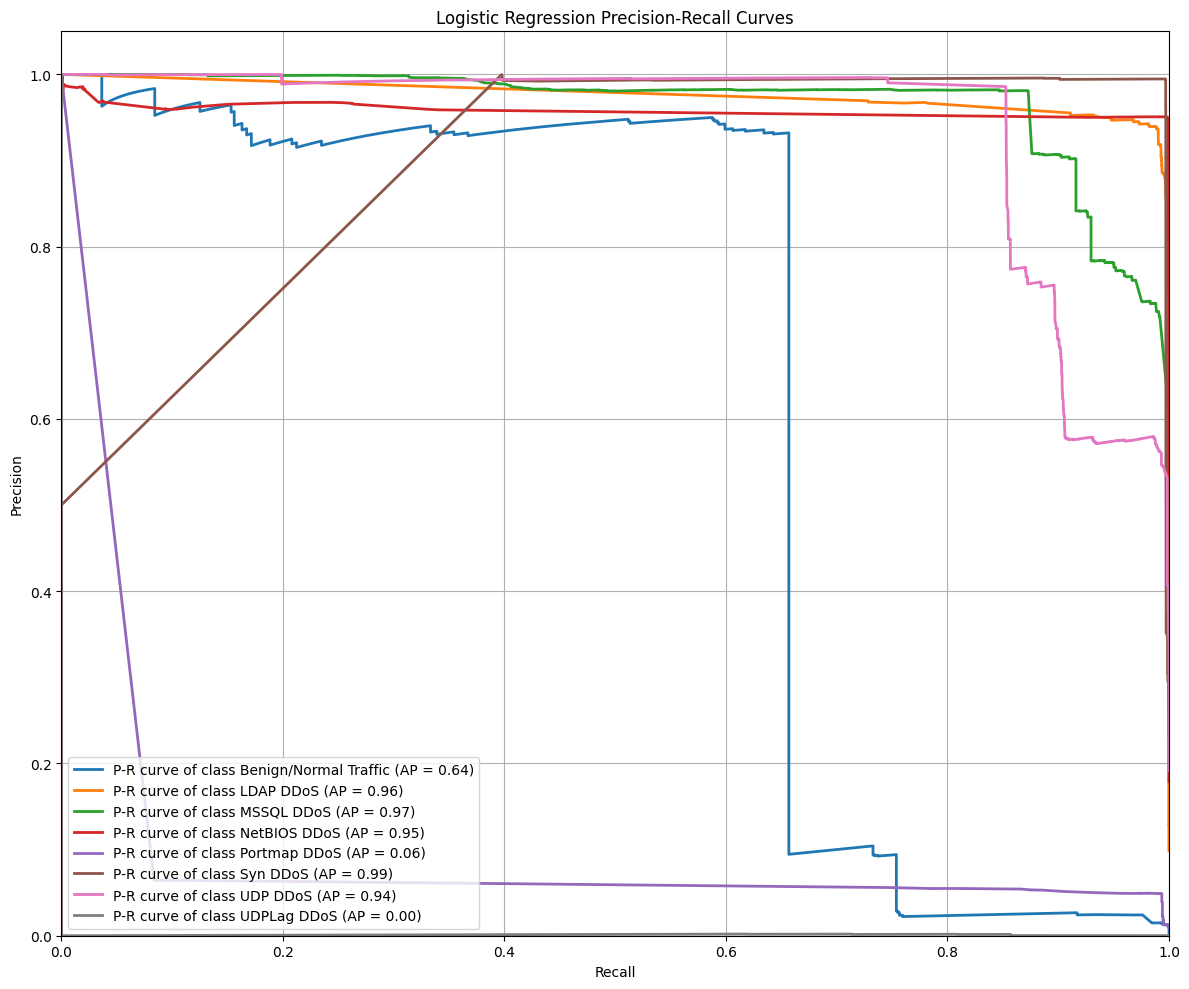


ROC AUC (OvR): 0.9624
PR AUC (Macro): 0.6894

Feature Coefficient Analysis:


<ipython-input-20-a8f60f85eea8>:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")
<ipython-input-20-a8f60f85eea8>:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")
<ipython-input-20-a8f60f85eea8>:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")
<ipython-input-20-a8f60f85eea8>:169: FutureWarning: 

Passing

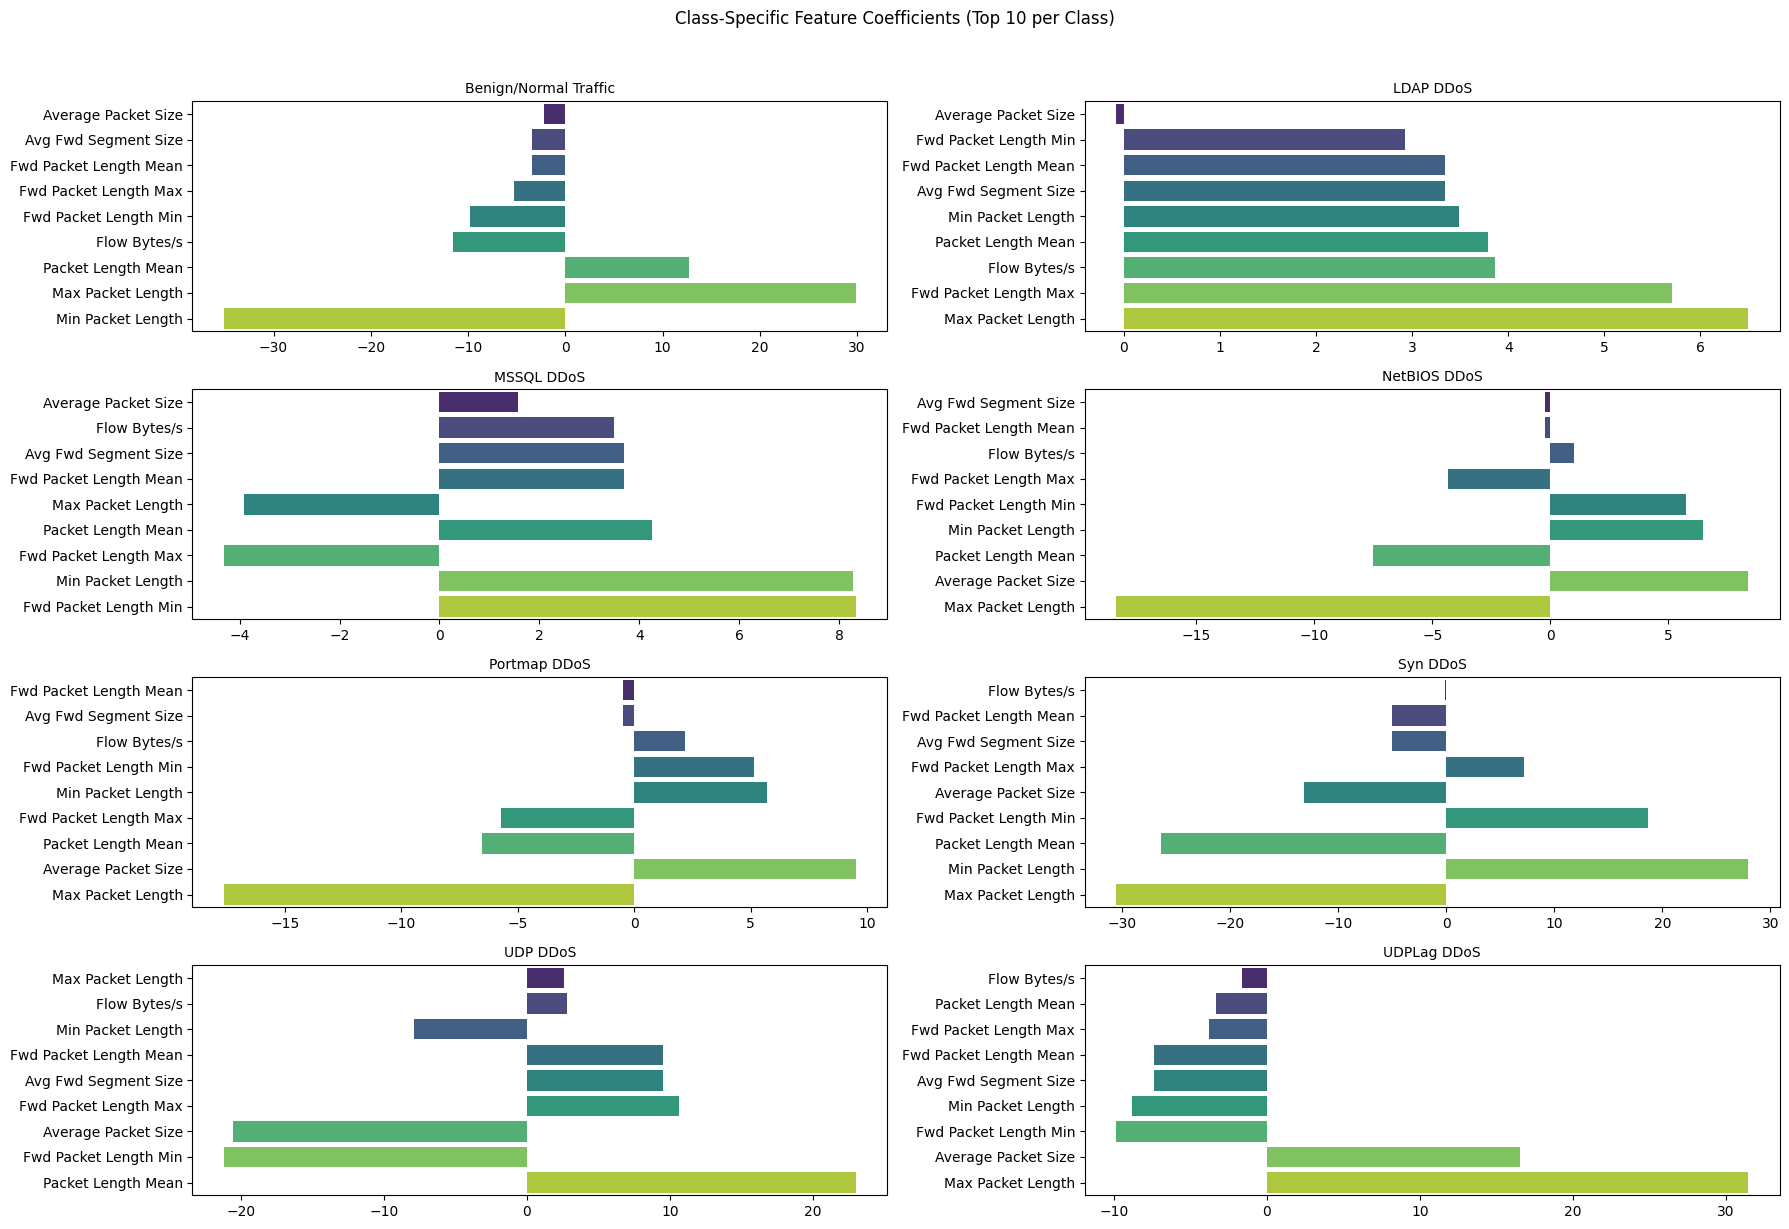


Probability Calibration Analysis:


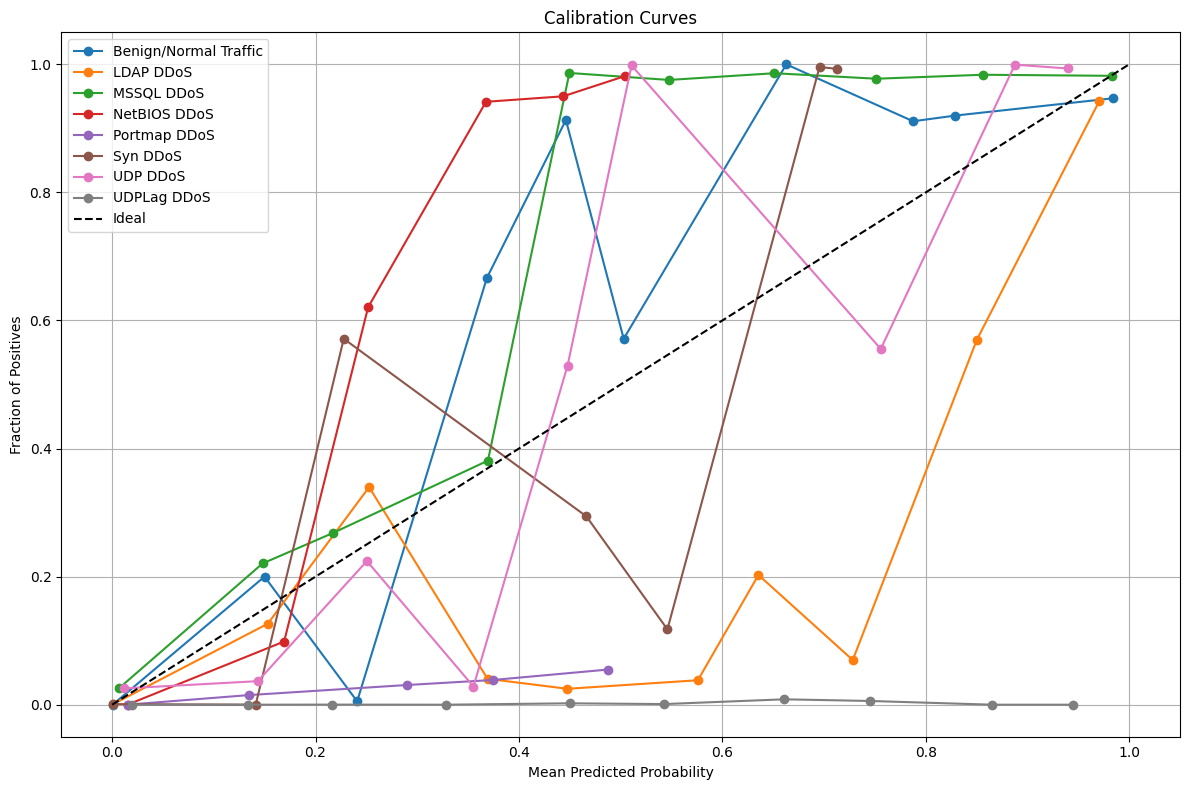


Logistic Regression model saved to /content/drive/MyDrive/data/logreg_model_20250516_043028.joblib


In [ ]:
# ==============================
# Logistic Regression Classifier
# ==============================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    average_precision_score, roc_curve, auc, precision_recall_curve
)
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Initialize Logistic Regression with parameters for multiclass classification
logreg_model = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    penalty='l2',
    C=0.5,
    max_iter=1000,
    n_jobs=-1,
    random_state=42
)

# Cross-validation metrics
print("="*40)
print("Logistic Regression Cross-Validation Metrics:")
print("="*40)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}
cv_results = cross_validate(logreg_model, X_train_scaled, y_train_res,
                           cv=5, scoring=scoring, n_jobs=-1)

print(f"Mean CV Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean CV Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean CV Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean CV F1-Score: {cv_results['test_f1'].mean():.4f}")

# Full training and evaluation
logreg_model.fit(X_train_scaled, y_train_res)
y_pred = logreg_model.predict(X_test_scaled)
y_proba = logreg_model.predict_proba(X_test_scaled)

# Classification metrics
print("\n" + "="*40)
print("Test Set Evaluation:")
print("="*40)
print(classification_report(y_test, y_pred, digits=4, target_names=class_names))

# Classification metrics visualization (Added Section)
print("\n" + "="*40)
print("Test Set Metrics Visualization:")
print("="*40)

# Extract metrics from classification report
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
class_data = {cls: [report[cls][m] for m in metrics] for cls in class_names}
df_metrics = pd.DataFrame(class_data).T
df_metrics.columns = [m.title() for m in metrics]

# Add macro/weighted averages
df_metrics.loc['Macro Avg'] = [report['macro avg'][m] for m in metrics]
df_metrics.loc['Weighted Avg'] = [report['weighted avg'][m] for m in metrics]

plt.figure(figsize=(12, 8))
sns.heatmap(df_metrics.T, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
plt.title("Test Set Metrics by Class", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Metric", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{data_path}logreg_test_metrics_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Logistic Regression Confusion Matrix (Normalized)")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(f"{data_path}logreg_confusion_matrix_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# ROC curves - One vs Rest approach
n_classes = 8
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 10))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curves - One-vs-Rest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{data_path}logreg_roc_curves_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Precision-Recall curves
precision = dict()
recall = dict()
avg_prec = dict()

plt.figure(figsize=(12, 10))

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    avg_prec[i] = average_precision_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(recall[i], precision[i], lw=2,
             label=f'P-R curve of class {class_names[i]} (AP = {avg_prec[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curves')
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{data_path}logreg_pr_curves_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Calculate overall ROC AUC and PR AUC
roc_auc_ovr = roc_auc_score(y_test, y_proba, multi_class='ovr')
pr_auc_macro = np.mean(list(avg_prec.values()))

print(f"\nROC AUC (OvR): {roc_auc_ovr:.4f}")
print(f"PR AUC (Macro): {pr_auc_macro:.4f}")

# Logistic Regression Specific Visualizations
# ==========================================

# 1. Feature Coefficient Analysis
print("\n" + "="*40)
print("Feature Coefficient Analysis:")
print("="*40)
if hasattr(logreg_model, 'coef_'):
    feature_names = X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else [f"Feature {i}" for i in range(X_train_scaled.shape[1])]

    plt.figure(figsize=(18, 12))
    for i, class_name in enumerate(class_names):
        plt.subplot(4, 2, i+1)
        coefs = logreg_model.coef_[i]
        sorted_idx = np.argsort(np.abs(coefs))[-10:]  # Top 10 features
        sns.barplot(x=coefs[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")
        plt.title(f"{class_name}", fontsize=10)
    plt.suptitle("Class-Specific Feature Coefficients (Top 10 per Class)", y=1.02)
    plt.tight_layout()
    plt.savefig(f"{data_path}logreg_coefficients_{current_timestamp}.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Feature coefficients not available")

# 2. Probability Calibration Curves
print("\n" + "="*40)
print("Probability Calibration Analysis:")
print("="*40)
from sklearn.calibration import calibration_curve

plt.figure(figsize=(12, 8))
for i in range(n_classes):
    prob_true, prob_pred = calibration_curve(y_test_bin[:, i], y_proba[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=class_names[i])

plt.plot([0, 1], [0, 1], 'k--', label="Ideal")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curves")
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.savefig(f"{data_path}logreg_calibration_{current_timestamp}.png", dpi=300, bbox_inches='tight')
plt.show()

# Save the model
import joblib
joblib.dump(logreg_model, f"{data_path}logreg_model_{current_timestamp}.joblib")
print(f"\nLogistic Regression model saved to {data_path}logreg_model_{current_timestamp}.joblib")

In [ ]:
# ==============================
# LightGBM Classifier (Enhanced)
# ==============================
import lightgbm as lgb
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    average_precision_score, roc_curve, auc, precision_recall_curve
)
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# Initialize LightGBM with optimized parameters
lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=8,
    learning_rate=0.1,
    max_depth=-1,  # Leaf-wise growth
    n_estimators=500,
    class_weight='balanced',
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    importance_type='gain'
)

# Cross-validation metrics
print("="*40)
print("LightGBM Cross-Validation Metrics:")
print("="*40)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}
cv_results = cross_validate(lgb_model, X_train_scaled, y_train_res,
                           cv=5, scoring=scoring, n_jobs=-1)

print(f"Mean CV Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean CV Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean CV Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean CV F1-Score: {cv_results['test_f1'].mean():.4f}")

# Train with early stopping
print("\nTraining with early stopping...")
eval_set = [(X_train_scaled, y_train_res), (X_test_scaled, y_test)]
lgb_model.fit(X_train_scaled, y_train_res,
              eval_set=eval_set,
              eval_metric='multi_logloss',
              early_stopping_rounds=20,
              verbose=10)

# Evaluation
y_pred = lgb_model.predict(X_test_scaled)
y_proba = lgb_model.predict_proba(X_test_scaled)

# Classification Report
print("\n" + "="*40)
print("Test Set Evaluation:")
print("="*40)
print(classification_report(y_test, y_pred, digits=4, target_names=class_names))

# ======================
# Enhanced Visualizations
# ======================

# 1. Confusion Matrix (Normalized)
plt.figure(figsize=(14, 12))
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("LightGBM Confusion Matrix (Normalized)", fontsize=14)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(f"{data_path}lgb_confusion_matrix_{current_timestamp}.png",
            dpi=300, bbox_inches='tight')
plt.show()

# 2. ROC Curves (One-vs-Rest)
n_classes = 8
y_test_bin = label_binarize(y_test, classes=range(n_classes))

plt.figure(figsize=(14, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('LightGBM ROC Curves (One-vs-Rest)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{data_path}lgb_roc_curves_{current_timestamp}.png",
            dpi=300, bbox_inches='tight')
plt.show()

# 3. Precision-Recall Curves
plt.figure(figsize=(14, 10))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    avg_prec = average_precision_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(recall, precision, lw=2,
             label=f'{class_names[i]} (AP = {avg_prec:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('LightGBM Precision-Recall Curves', fontsize=14)
plt.legend(loc="lower left", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{data_path}lgb_pr_curves_{current_timestamp}.png",
            dpi=300, bbox_inches='tight')
plt.show()

# 4. Class Probability Distribution
plt.figure(figsize=(14, 8))
for i in range(n_classes):
    sns.kdeplot(y_proba[:, i], label=class_names[i], lw=2)
plt.title("Class Probability Distributions", fontsize=14)
plt.xlabel("Predicted Probability", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{data_path}lgb_prob_dist_{current_timestamp}.png",
            dpi=300, bbox_inches='tight')
plt.show()

# 5. Feature Importance
plt.figure(figsize=(12, 8))
lgb.plot_importance(lgb_model, height=0.8,
                   title="LightGBM Feature Importance (Gain)",
                   xlabel='Feature Importance Score',
                   ylabel='Features',
                   max_num_features=15,
                   importance_type='gain')
plt.tight_layout()
plt.savefig(f"{data_path}lgb_feature_importance_{current_timestamp}.png",
            dpi=300, bbox_inches='tight')
plt.show()

# 6. Learning Curves
results = lgb_model.evals_result_
plt.figure(figsize=(12, 6))
plt.plot(results['training']['multi_logloss'], label='Training', lw=2)
plt.plot(results['valid_1']['multi_logloss'], label='Validation', lw=2)
plt.title("LightGBM Learning Curve", fontsize=14)
plt.ylabel("Log Loss", fontsize=12)
plt.xlabel("Boosting Round", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{data_path}lgb_learning_curve_{current_timestamp}.png",
            dpi=300, bbox_inches='tight')
plt.show()

# Metrics Calculation
roc_auc_ovr = roc_auc_score(y_test, y_proba, multi_class='ovr')
pr_auc_macro = average_precision_score(y_test_bin, y_proba, average='macro')

print("\n" + "="*40)
print(f"ROC AUC (OvR): {roc_auc_ovr:.4f}")
print(f"PR AUC (Macro): {pr_auc_macro:.4f}")
print("="*40)

# Save model
joblib.dump(lgb_model, f"{data_path}lightgbm_model_{current_timestamp}.joblib")
print(f"\nLightGBM model saved to {data_path}lightgbm_model_{current_timestamp}.joblib")

# Display final metrics
print("\nFinal Test Metrics:")
print(f"- Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"- Macro Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"- Macro Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"- Macro F1: {f1_score(y_test, y_pred, average='macro'):.4f}")

LightGBM Cross-Validation Metrics:
Mean CV Accuracy: 0.8727
Mean CV Precision: 0.8816
Mean CV Recall: 0.8727
Mean CV F1-Score: 0.8602

Training with early stopping...


TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'